In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '20250107_NH3_N2/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(9348, 2048)


49.750000  50.250000  50.750000  51.250000  51.760000  52.260000  \
0      -38.0      -13.0        5.0       13.0       -1.0       39.0   
1      -37.0      -28.0       23.0        2.0       16.0       34.0   
2      -34.0      -25.0       21.0       13.0        5.0       38.0   
3      -37.0       -5.0       24.0       12.0       27.0       40.0   
4      -40.0      -23.0       14.0        5.0       32.0       40.0   

   52.760000  53.260000  53.760000  54.260000  ...  1186.380000  1186.990000  \
0        8.0        3.0       -8.0      -21.0  ...        -12.0          2.0   
1       13.0       -1.0      -20.0      -15.0  ...        -20.0         -2.0   
2       -8.0       -2.0       -6.0      -17.0  ...        -21.0         -7.0   
3        9.0       -3.0       -7.0      -21.0  ...        -14.0         -2.0   
4       10.0       -1.0        5.0      -20.0  ...        -22.0         -5.0   

   1187.590000  1188.200000  1188.810000  1189.410000  1190.020000  \
0        -24.0          1.0         -9.0         50.0         -2.0   
1        -23.0          9.0          5.0         38.0        -13.0   
2        -12.0          9.0          0.0         44.0         -6.0   
3        -11.0          4.0          4.0         51.0         -7.0   
4        -12.0         18.0          7.0         63.0         -5.0   

   1190.630000  1191.240000  1191.840000  
0        -22.0        -16.0        -11.0  
1        -23.0        -23.0         15.0  
2        -20.0        -20.0         -8.0  
3        -33.0        -22.0          7.0  
4        -28.0        -22.0          7.0  

[5 rows x 2048 columns]

In [4]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  \
0.0  -38.0  -13.0    5.0   13.0   -1.0   39.0    8.0    3.0   -8.0  -21.0   
0.6  -37.0  -28.0   23.0    2.0   16.0   34.0   13.0   -1.0  -20.0  -15.0   
1.2  -34.0  -25.0   21.0   13.0    5.0   38.0   -8.0   -2.0   -6.0  -17.0   
1.8  -37.0   -5.0   24.0   12.0   27.0   40.0    9.0   -3.0   -7.0  -21.0   
2.4  -40.0  -23.0   14.0    5.0   32.0   40.0   10.0   -1.0    5.0  -20.0   

     ...  1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  \
0.0  ...    -12.0      2.0    -24.0     1.0     -9.0     50.0     -2.0   
0.6  ...    -20.0     -2.0    -23.0     9.0      5.0     38.0    -13.0   
1.2  ...    -21.0     -7.0    -12.0     9.0      0.0     44.0     -6.0   
1.8  ...    -14.0     -2.0    -11.0     4.0      4.0     51.0     -7.0   
2.4  ...    -22.0     -5.0    -12.0    18.0      7.0     63.0     -5.0   

     1190.63  1191.24  1191.83  
0.0    -22.0    -16.0    -11.0  
0.6    -23.0    -23.0     15.0  
1.2    -20.0    -20.0     -8.0  
1.8    -33.0    -22.0      7.0  
2.4    -28.0    -22.0      7.0  

[5 rows x 2048 columns]

In [56]:
# extact 20, 40 and 60 cycles
c10 = df[(df.index >= 830) & (df.index <=920)]
c20 = df[(df.index >= 1680) & (df.index <=1770)]
c30 = df[(df.index >= 2565) & (df.index <=2655)]
c40 = df[(df.index >= 3430) & (df.index <=3520)] # 90s
c50 = df[(df.index >= 4300) & (df.index <=4390)]
c60 = df[(df.index >= 5150) & (df.index <=5240)]

49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  \
1680.0  -42.0  -36.0   19.0   -3.0   14.0   50.0    6.0    5.0  -16.0  -31.0   
1680.6  -34.0  -24.0   10.0   -6.0    9.0   40.0  -12.0  -13.0    3.0  -28.0   
1681.2  -36.0  -29.0   13.0   10.0   19.0   41.0    0.0   -9.0    2.0  -23.0   
1681.8  -49.0  -30.0    8.0    5.0    7.0   38.0    1.0   10.0   14.0  -29.0   
1682.4  -33.0  -30.0   12.0   -6.0   19.0   45.0    3.0    9.0   -4.0  -33.0   

        ...  1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  \
1680.0  ...    -17.0     16.0    -17.0    10.0     -2.0     58.0    -18.0   
1680.6  ...     -8.0    -11.0     -3.0    -7.0      6.0     52.0    -15.0   
1681.2  ...    -16.0     -9.0     -9.0   -10.0      6.0     62.0    -12.0   
1681.8  ...     -9.0      3.0     -9.0    -1.0      4.0     51.0      0.0   
1682.4  ...     -9.0     -7.0    -18.0     6.0     -7.0     43.0    -11.0   

        1190.63  1191.24  1191.83  
1680.0    -30.0    -15.0    -19.0  
1680.6    -19.0    -26.0     13.0  
1681.2    -28.0    -29.0      7.0  
1681.8    -20.0    -22.0     -3.0  
1682.4    -38.0    -21.0      6.0  

[5 rows x 2048 columns]

In [66]:
print(c10.head())
print(c20.head())
print(c30.head())
print(c40.head())
print(c50.head())
print(c60.head())

       49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  \
830.4    0.0    0.0   24.0    0.0    6.0   33.0    0.0    6.0    0.0    0.0   
831.0    0.0    0.0    8.0    0.0    7.0   31.0    3.0   10.0    0.0    0.0   
831.6    0.0    0.0   10.0    0.0   26.0   45.0    0.0    1.0    0.0    0.0   
832.2    0.0    0.0   18.0    7.0   13.0   48.0    2.0    0.0    0.0    0.0   
832.8    0.0    0.0    2.0   14.0    1.0   38.0    0.0    0.0    7.0    0.0   

       ...  1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  \
830.4  ...      0.0      2.0      0.0     2.0      0.0     49.0      1.0   
831.0  ...      0.0      0.0      0.0     0.0      0.0     47.0      0.0   
831.6  ...      0.0      0.0      0.0     2.0      0.0     49.0      0.0   
832.2  ...      0.0      8.0      0.0     3.0      0.0     44.0      0.0   
832.8  ...      0.0      3.0      0.0     0.0      0.0     58.0     12.0   

       1190.63  1191.24  1191.83  
830.4      0.0      0.0      8.0 

In [59]:
c10_log = c10.copy()
c20_log = c20.copy()
c30_log = c30.copy()
c40_log = c40.copy()
c50_log = c50.copy()
c60_log = c60.copy()

x_10 = [0.6*i for i in range(len(c10.index))]
y_10 = c10.columns.tolist()
x_20 = [0.6*i for i in range(len(c20.index))]
y_20 = c20.columns.tolist()
x_30 = [0.6*i for i in range(len(c30.index))]
y_30 = c30.columns.tolist()
x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()
x_50 = [0.6*i for i in range(len(c50.index))]
y_50 = c50.columns.tolist()
x_60 = [0.6*i for i in range(len(c60.index))]
y_60 = c60.columns.tolist()

# absolute
for i in range(len(c10.index)):
    for j in range(len(c10.columns)):
        if c10.iloc[i,j]<0:
            c10.iloc[i,j]=0
# log
for i in range(len(c10_log.index)):
    for j in range(len(c10.columns)):
        if c10_log.iloc[i,j]<=1:
            c10_log.iloc[i,j]=0
        else:
            c10_log.iloc[i,j] = np.log10(c10_log.iloc[i,j])
            
# absolute
for i in range(len(c20.index)):
    for j in range(len(c20.columns)):
        if c20.iloc[i,j]<0:
            c20.iloc[i,j]=0
# log
for i in range(len(c20_log.index)):
    for j in range(len(c20.columns)):
        if c20_log.iloc[i,j]<=1:
            c20_log.iloc[i,j]=0
        else:
            c20_log.iloc[i,j] = np.log10(c20_log.iloc[i,j])

# absolute
for i in range(len(c30.index)):
    for j in range(len(c30.columns)):
        if c30.iloc[i,j]<0:
            c30.iloc[i,j]=0
# log
for i in range(len(c30_log.index)):
    for j in range(len(c30.columns)):
        if c30_log.iloc[i,j]<=1:
            c30_log.iloc[i,j]=0
        else:
            c30_log.iloc[i,j] = np.log10(c30_log.iloc[i,j])
            
# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log10(c40_log.iloc[i,j])

# absolute
for i in range(len(c50.index)):
    for j in range(len(c50.columns)):
        if c50.iloc[i,j]<0:
            c50.iloc[i,j]=0
# log
for i in range(len(c50_log.index)):
    for j in range(len(c50.columns)):
        if c50_log.iloc[i,j]<=1:
            c50_log.iloc[i,j]=0
        else:
            c50_log.iloc[i,j] = np.log10(c50_log.iloc[i,j])
            
# absolute
for i in range(len(c60.index)):
    for j in range(len(c60.columns)):
        if c60.iloc[i,j]<0:
            c60.iloc[i,j]=0
# log
for i in range(len(c60_log.index)):
    for j in range(len(c60.columns)):
        if c60_log.iloc[i,j]<=1:
            c60_log.iloc[i,j]=0
        else:
            c60_log.iloc[i,j] = np.log10(c60_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_23832\118736695.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c10.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_23832\118736695.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c20.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_23832\118736695.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c30.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_23832\11

In [60]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(c10_log.columns).reshape(-1, 1))
y_10 = mm.transform(np.array(c10_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c20_log.columns).reshape(-1, 1))
y_20 = mm.transform(np.array(c20_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c30_log.columns).reshape(-1, 1))
y_30 = mm.transform(np.array(c30_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c40_log.columns).reshape(-1, 1))
y_40 = mm.transform(np.array(c40_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c50_log.columns).reshape(-1, 1))
y_50 = mm.transform(np.array(c50_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c60_log.columns).reshape(-1, 1))
y_60 = mm.transform(np.array(c60_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

In [61]:
X_10, Y_10 = np.meshgrid(x_10, y_10)
Z_10 = c10_log.T

X_20, Y_20 = np.meshgrid(x_20, y_20)
Z_20 = c20_log.T

X_30, Y_30 = np.meshgrid(x_30, y_30)
Z_30 = c30_log.T

X_40, Y_40 = np.meshgrid(x_40, y_40)
Z_40 = c40_log.T

X_50, Y_50 = np.meshgrid(x_50, y_50)
Z_50 = c50_log.T

X_60, Y_60 = np.meshgrid(x_60, y_60)
Z_60 = c60_log.T

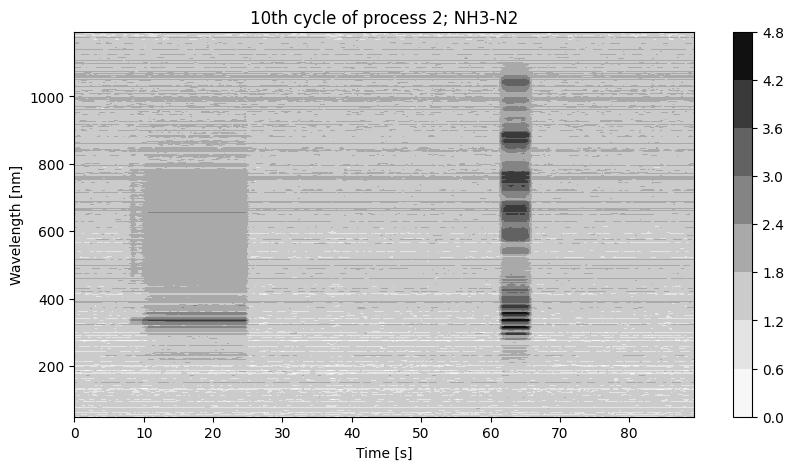

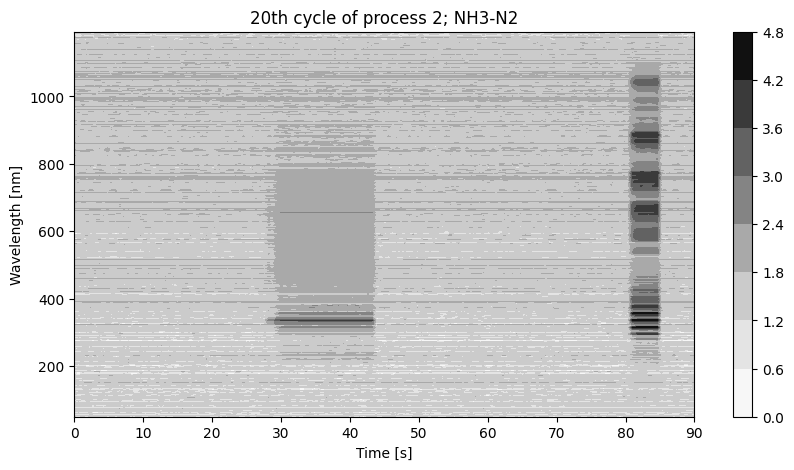

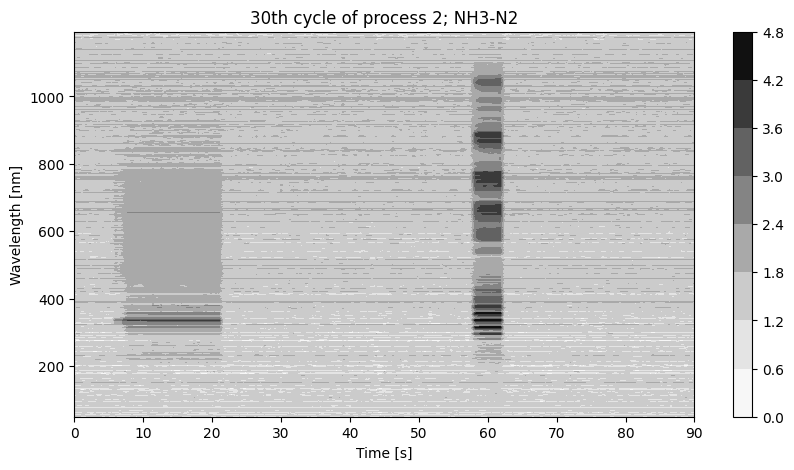

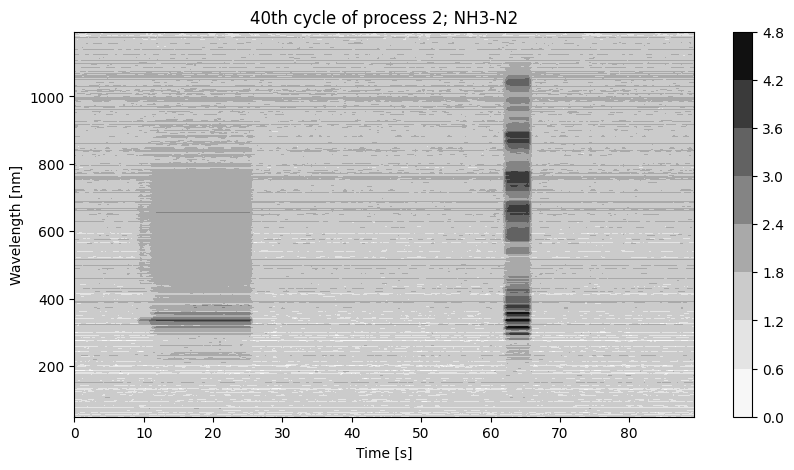

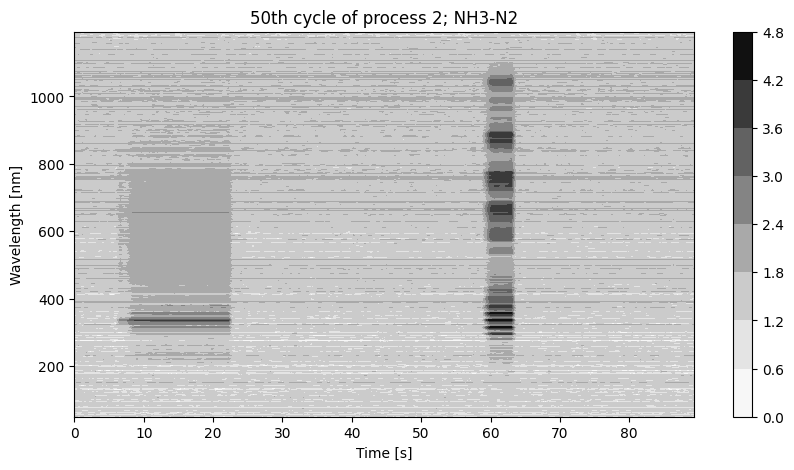

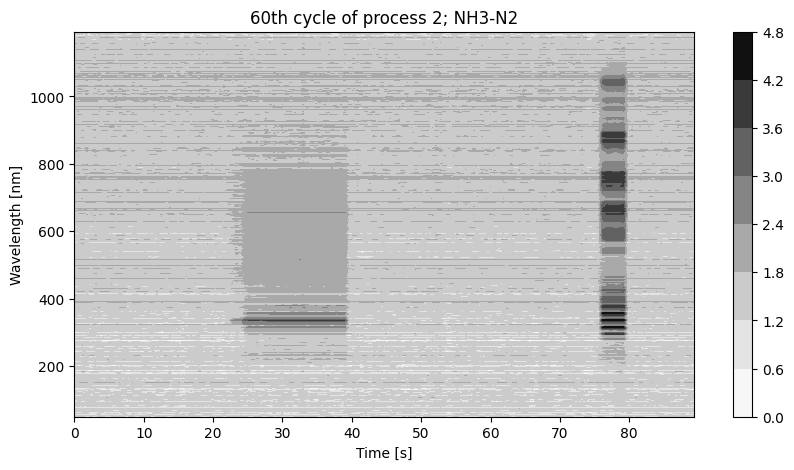

In [62]:
plt.figure(figsize=(10,5))
plt.contourf(X_10, Y_10, Z_10, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('10th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_30, Y_30, Z_30, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('30th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_50, Y_50, Z_50, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('50th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

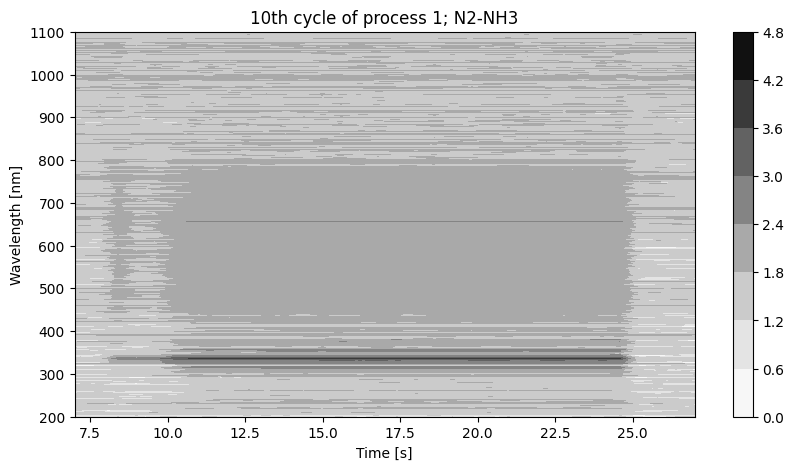

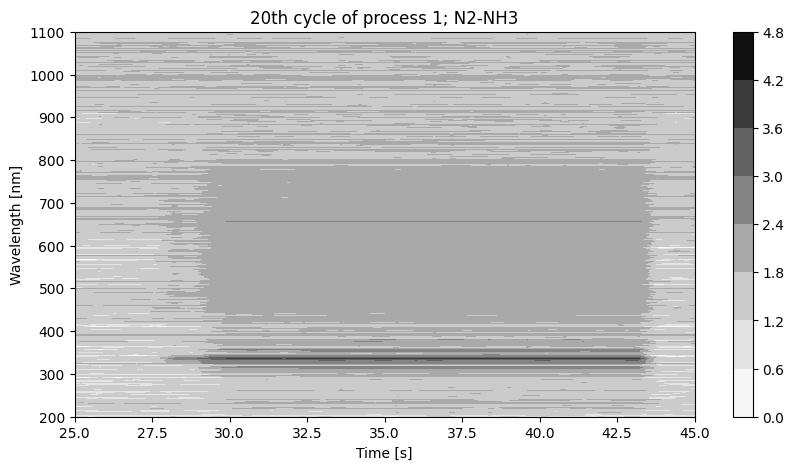

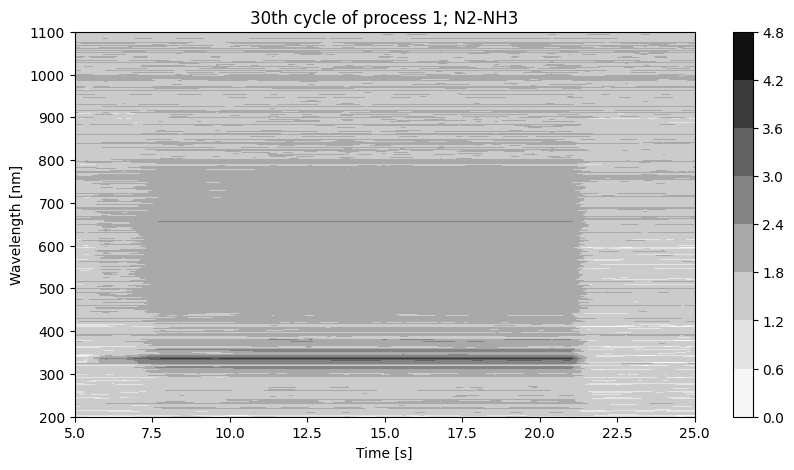

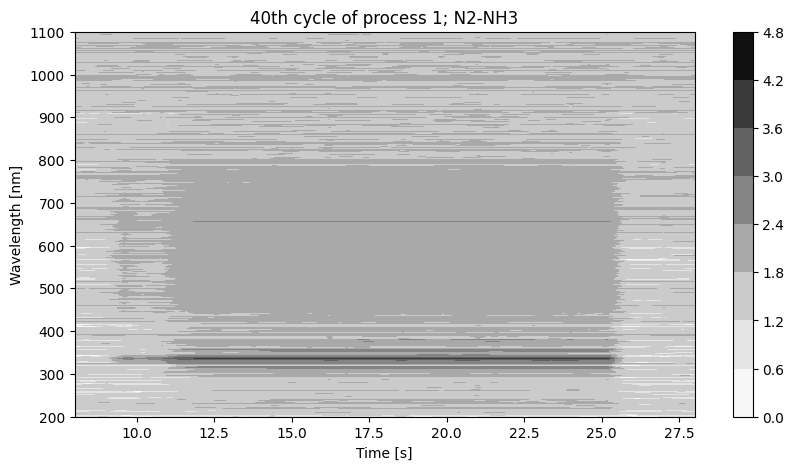

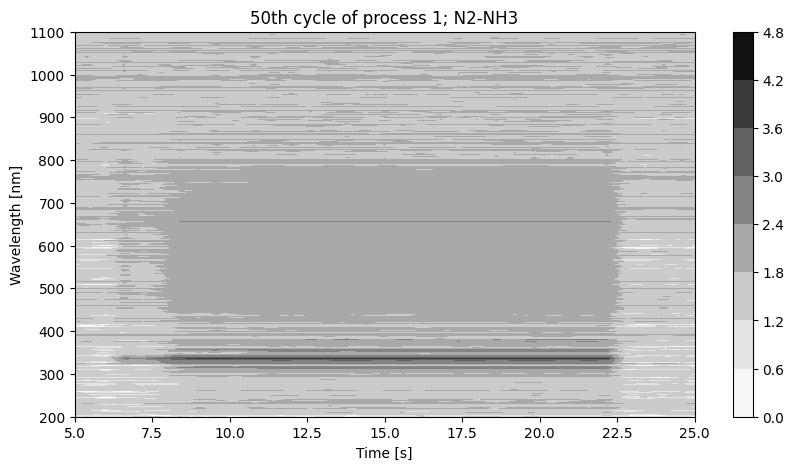

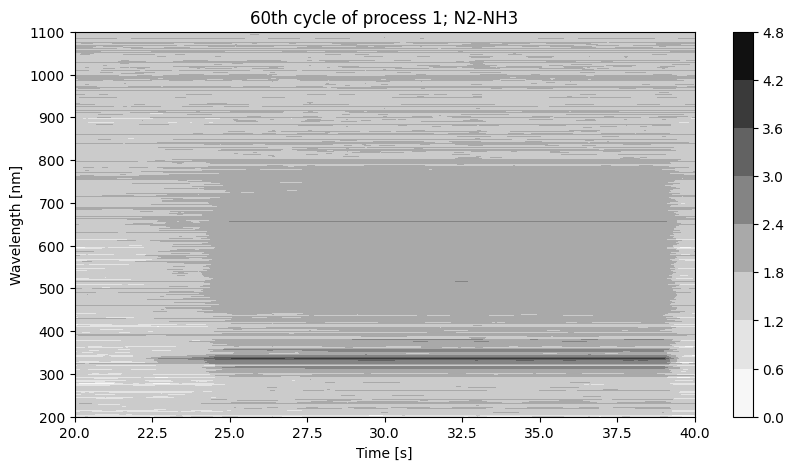

In [64]:
#NH3
plt.figure(figsize=(10,5))
plt.contourf(X_10, Y_10, Z_10, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(7,27) # 20s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('10th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(25,45) # 17s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_30, Y_30, Z_30, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(5,25) # 17s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('30th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(8,28) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_50, Y_50, Z_50, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(5,25) # 17s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('50th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(20,40) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

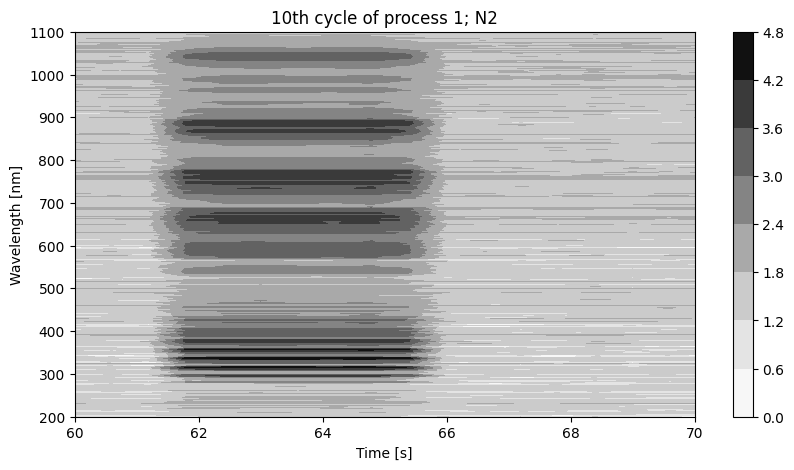

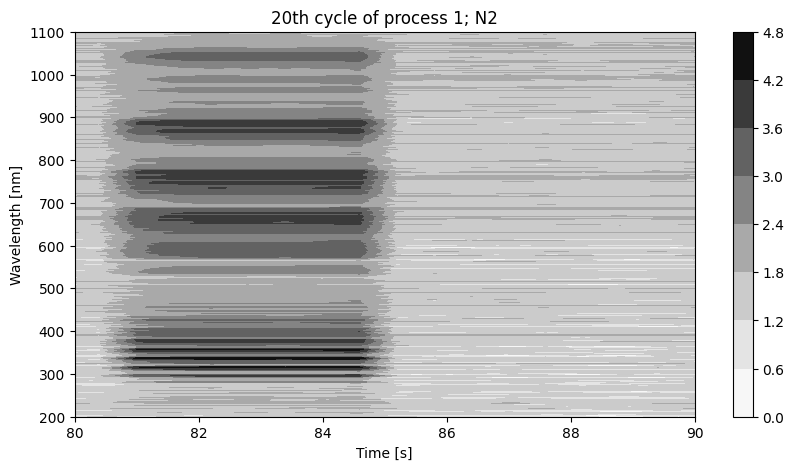

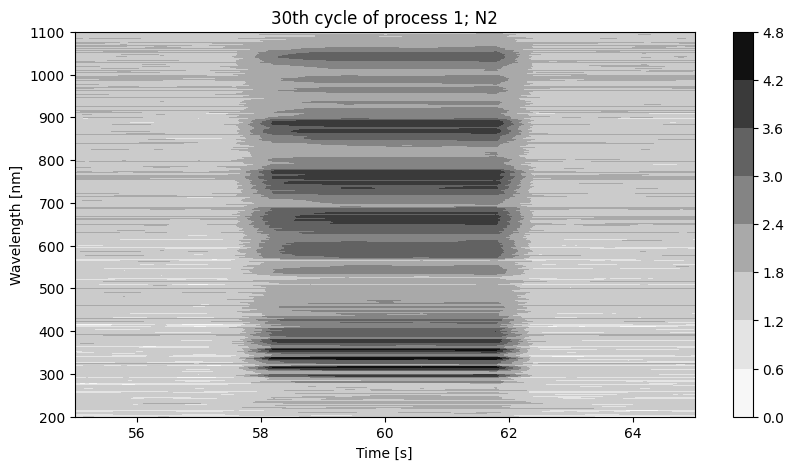

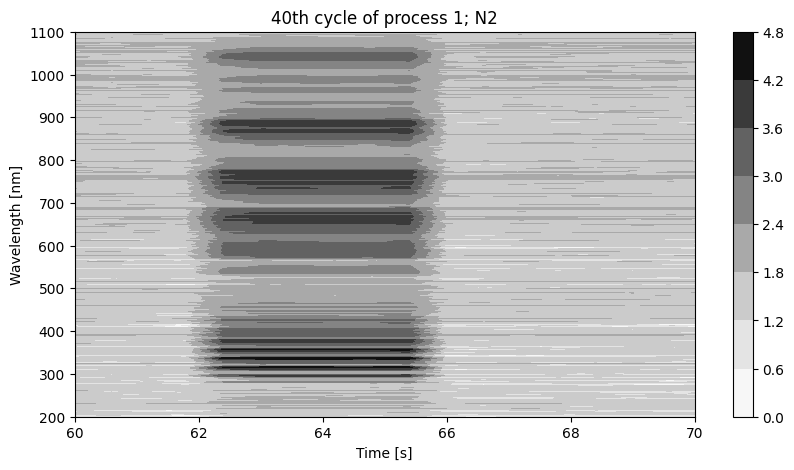

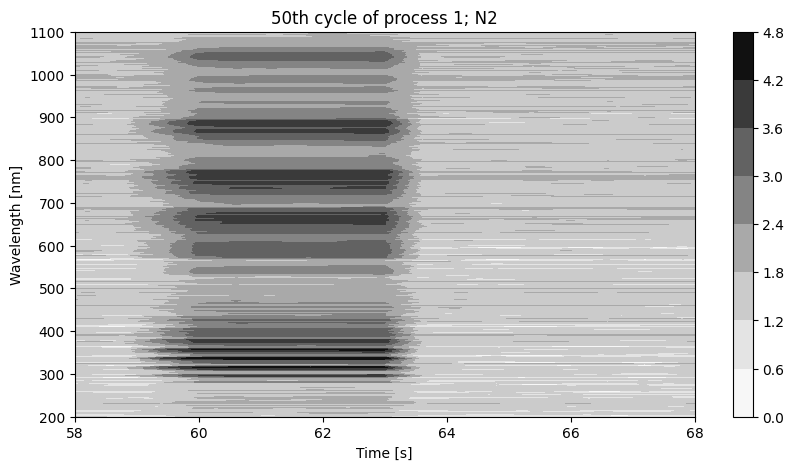

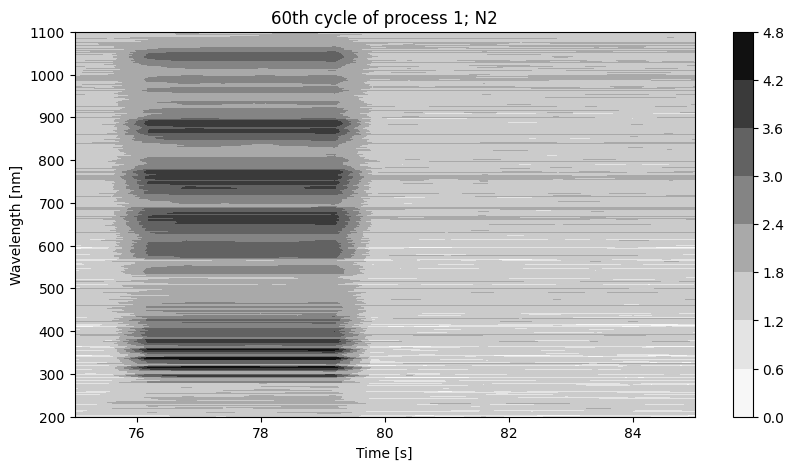

In [65]:
#N2
plt.figure(figsize=(10,5))
plt.contourf(X_10, Y_10, Z_10, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(60,70) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('10th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(80,90) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_30, Y_30, Z_30, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(55,65) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('30th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(60,70) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_50, Y_50, Z_50, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(58,68) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('50th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(75,85) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2')
plt.colorbar()
plt.show()

In [67]:
c10_start = 830.4
c10_N2 = c10[(c10.index>=c10_start+60)&(c10.index<=c10_start+70)]
c10_NH3 = c10[(c10.index>=c10_start+7)&(c10.index<=c10_start+27)]

c20_start = 1680
c20_N2 = c20[(c20.index>=c20_start+80)&(c20.index<=c20_start+90)]
c20_NH3 = c20[(c20.index>=c20_start+25)&(c20.index<=c20_start+45)]

c30_start = 2565
c30_N2 = c30[(c30.index>=c30_start+55)&(c30.index<=c30_start+65)]
c30_NH3 = c30[(c30.index>=c30_start+5)&(c30.index<=c30_start+25)]

c40_start = 3430.2
c40_N2 = c40[(c40.index>=c40_start+60)&(c40.index<=c40_start+70)]
c40_NH3 = c40[(c40.index>=c40_start+8)&(c40.index<=c40_start+28)]

c50_start = 4300.2
c50_N2 = c50[(c50.index>=c50_start+58)&(c50.index<=c50_start+68)]
c50_NH3 = c50[(c50.index>=c50_start+5)&(c50.index<=c50_start+25)]

c60_start = 5150.4
c60_N2 = c60[(c60.index>=c60_start+75)&(c60.index<=c60_start+85)]
c60_NH3 = c60[(c60.index>=c60_start+20)&(c60.index<=c60_start+40)]

In [17]:
c20_N2

49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  \
1760.4    0.0    0.0   24.0   11.0    6.0   28.0    0.0    8.0    6.0    0.0   
1761.0    0.0    0.0   16.0    3.0   24.0   23.0   15.0    0.0    0.0    0.0   
1761.6    0.0    0.0   23.0    1.0   18.0   38.0    0.0   13.0    0.0    0.0   
1762.2    0.0    0.0    7.0    0.0    0.0   29.0    0.0    0.0    0.0    0.0   
1762.8    0.0    0.0   15.0    7.0   16.0   30.0    0.0    0.0    1.0    0.0   
1763.4    0.0    0.0   24.0    0.0   20.0   43.0    0.0    0.0    8.0    0.0   
1764.0    0.0    0.0   12.0    9.0   23.0   32.0    0.0    0.0    0.0    0.0   
1764.6    0.0    0.0   11.0    2.0   16.0   51.0    0.0   11.0    0.0    0.0   
1765.2    0.0    0.0   16.0    2.0   19.0   42.0    0.0   16.0    0.0    0.0   
1765.8    0.0    0.0    6.0    0.0   15.0   34.0    0.0    0.0    0.0    0.0   

        ...  1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  \
1760.4  ...      0.0      0.0      0.0     8.0     13.0     47.0      0.0   
1761.0  ...      0.0      0.0      0.0     0.0      7.0     44.0      1.0   
1761.6  ...      0.0      9.0      0.0     0.0     10.0     56.0      0.0   
1762.2  ...      0.0      5.0      0.0     2.0      2.0     48.0      0.0   
1762.8  ...      1.0      0.0      0.0     1.0      3.0     39.0      0.0   
1763.4  ...      0.0      2.0      0.0     4.0      3.0     47.0      0.0   
1764.0  ...      0.0      0.0      0.0     0.0      3.0     53.0      4.0   
1764.6  ...      0.0      0.0      0.0     6.0      0.0     55.0      4.0   
1765.2  ...      0.0      0.0      0.0     0.0      2.0     49.0      0.0   
1765.8  ...      0.0      0.0      0.0     7.0      0.0     48.0      0.0   

        1190.63  1191.24  1191.83  
1760.4      0.0      0.0      0.0  
1761.0      0.0      0.0      0.0  
1761.6      0.0      0.0      1.0  
1762.2      0.0      0.0      0.0  
1762.8      0.0      0.0      8.0  
1763.4      0.0      0.0      6.0  
1764.0      0.0      0.0      0.0  
1764.6      0.0      0.0      0.0  
1765.2      0.0      0.0      0.0  
1765.8      0.0      0.0      8.0  

[10 rows x 2048 columns]

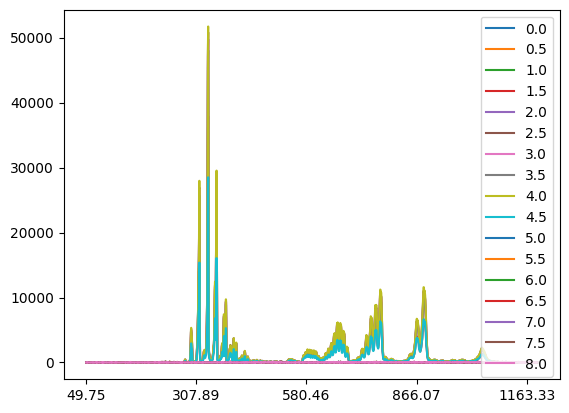

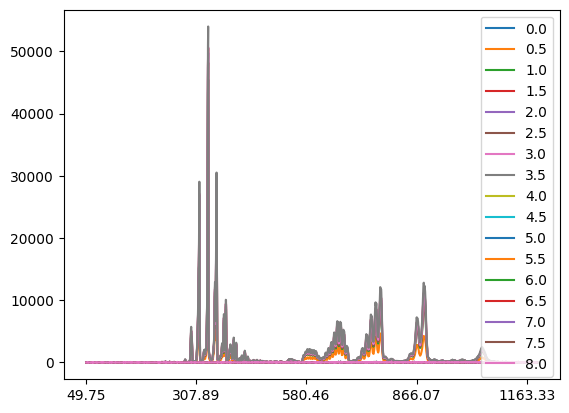

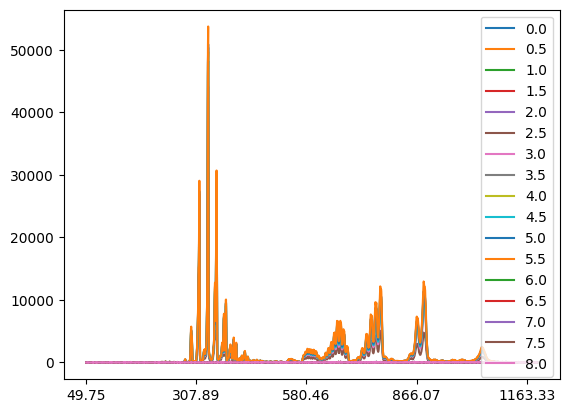

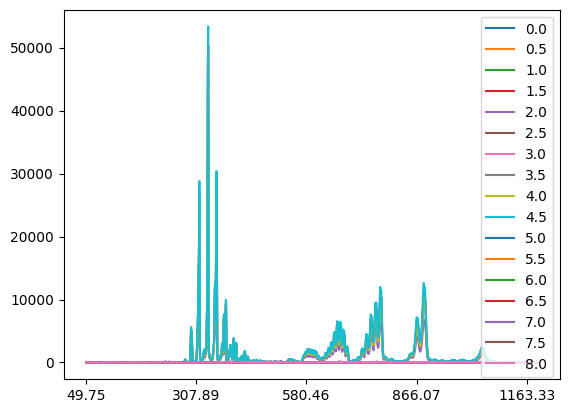

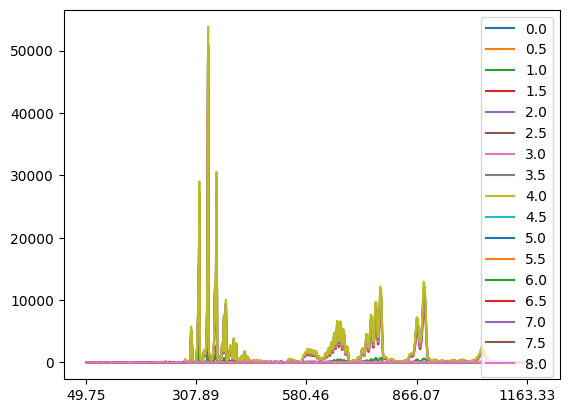

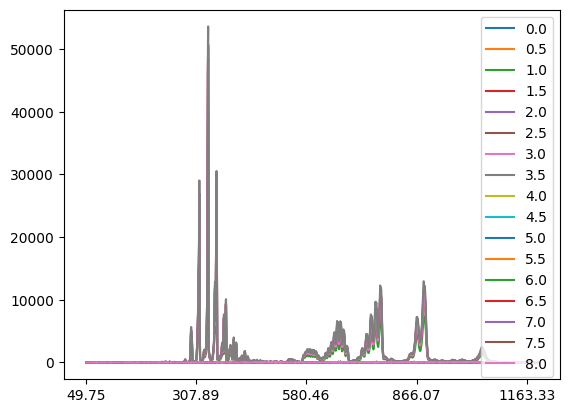

In [68]:
c10_N2.index = [np.round(0.5*i,2) for i in range(len(c10_N2))]
c10_N2.T.plot(kind='line')
plt.show()

c20_N2.index = [np.round(0.5*i,2) for i in range(len(c20_N2))]
c20_N2.T.plot(kind='line')
plt.show()

c30_N2.index = [np.round(0.5*i,2) for i in range(len(c30_N2))]
c30_N2.T.plot(kind='line')
plt.show()

c40_N2.index = [np.round(0.5*i,2) for i in range(len(c40_N2))]
c40_N2.T.plot(kind='line')
plt.show()

c50_N2.index = [np.round(0.5*i,2) for i in range(len(c50_N2))]
c50_N2.T.plot(kind='line')
plt.show()

c60_N2.index = [np.round(0.5*i,2) for i in range(len(c60_N2))]
c60_N2.T.plot(kind='line')
plt.show()

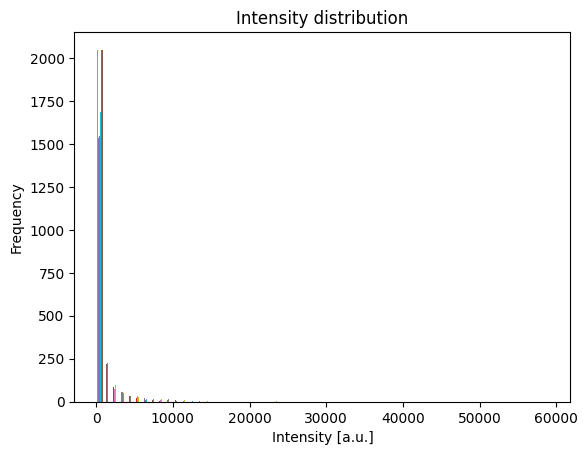

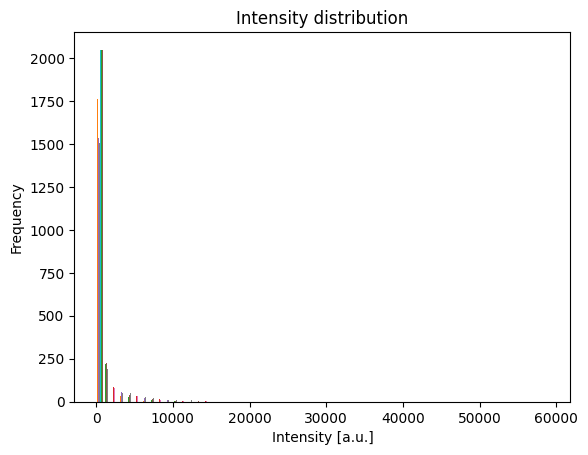

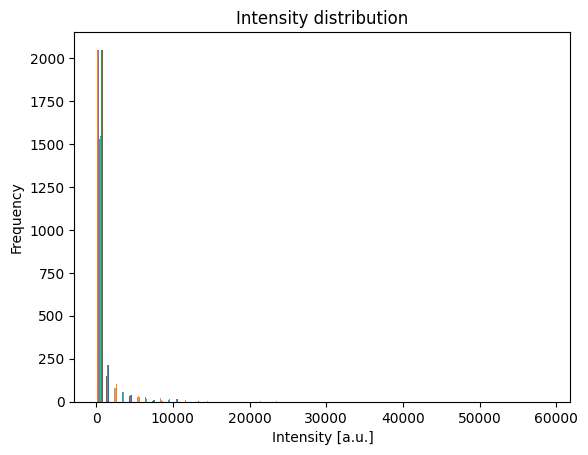

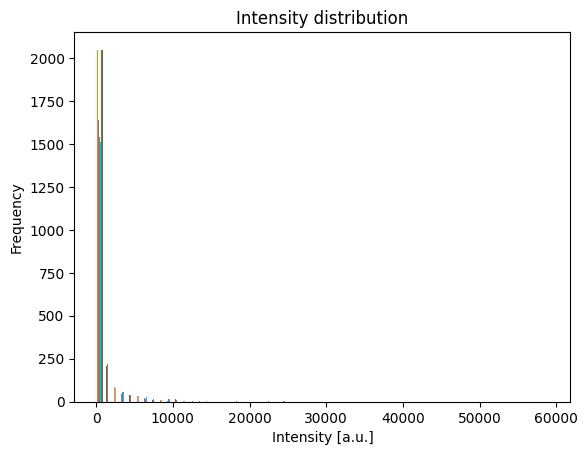

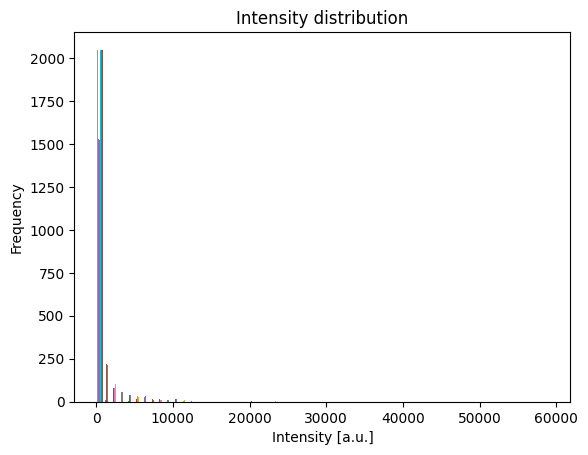

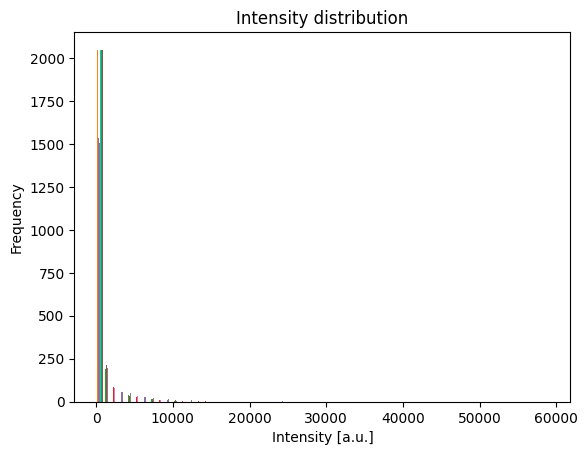

In [70]:
plt.hist(c10_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c20_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c30_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c40_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c50_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c60_N2.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

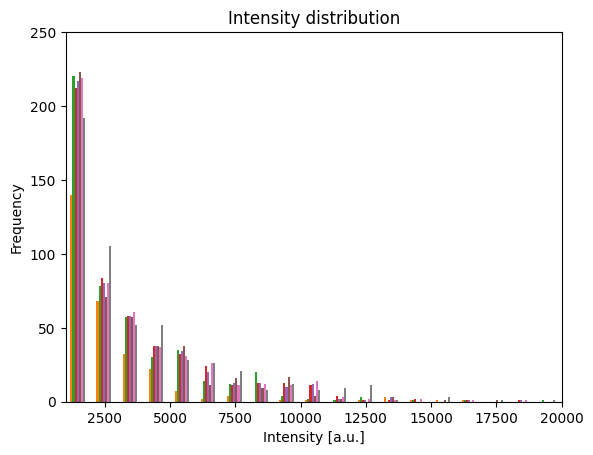

In [22]:
plt.hist(c20_N2.values.tolist(), bins=np.arange(0,60000,1000))
plt.xlim(1000,20000)
plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

In [73]:
max_int = []
for i in range(len(c10_N2.columns)):
    max_int.append(c10_N2.iloc[:,i].max())
pd.DataFrame(max_int, index=c10_N2.columns, columns=['cycle20'])

cycle20
49.75        0.0
50.25        0.0
50.75       25.0
51.25       17.0
51.76       32.0
...          ...
1189.41     70.0
1190.02     12.0
1190.63      0.0
1191.24      0.0
1191.83     10.0

[2048 rows x 1 columns]

In [74]:
max_intensities = pd.DataFrame(max_int, index=c10_N2.columns, columns=['cycle10'])

max_int = []
for i in range(len(c20_N2.columns)):
    max_int.append(c20_N2.iloc[:,i].max())
max_intensities['cycle20'] = max_int

max_int = []
for i in range(len(c30_N2.columns)):
    max_int.append(c30_N2.iloc[:,i].max())
max_intensities['cycle30'] = max_int

max_int = []
for i in range(len(c40_N2.columns)):
    max_int.append(c40_N2.iloc[:,i].max())
max_intensities['cycle40'] = max_int

max_int = []
for i in range(len(c50_N2.columns)):
    max_int.append(c50_N2.iloc[:,i].max())
max_intensities['cycle50'] = max_int

max_int = []
for i in range(len(c40_N2.columns)):
    max_int.append(c40_N2.iloc[:,i].max())
    
max_intensities['cycle60'] = max_int

max_intensities.head()

cycle10  cycle20  cycle30  cycle40  cycle50  cycle60
49.75      0.0      0.0      0.0      0.0      0.0      0.0
50.25      0.0      0.0      0.0      0.0      0.0      0.0
50.75     25.0     24.0     23.0     23.0     21.0     23.0
51.25     17.0     11.0     20.0     20.0     21.0     20.0
51.76     32.0     33.0     31.0     32.0     34.0     32.0

In [75]:
max_intensities = max_intensities.sort_values(by=['cycle10', 'cycle20', 'cycle30', 'cycle40', 'cycle50', 'cycle60'], ascending=False)
max_intensities.to_csv('file/process2/max_intensities.csv')

In [76]:
# scaling and clustering
from sklearn.preprocessing import MinMaxScaler
c10_N2_scaled = c10_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c10_N2_scaled.index)):
    for j in range(len(c10_N2_scaled.columns)):
        if c10_N2_scaled.iloc[i,j]<1000:
            c10_N2_scaled.iloc[i,j]=0
for i in range(len(c10_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c10_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c10_N2_scaled.iloc[:,i] = mm.transform(np.array(c10_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c20_N2_scaled = c20_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c20_N2_scaled.index)):
    for j in range(len(c20_N2_scaled.columns)):
        if c20_N2_scaled.iloc[i,j]<1000:
            c20_N2_scaled.iloc[i,j]=0
for i in range(len(c20_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c20_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c20_N2_scaled.iloc[:,i] = mm.transform(np.array(c20_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c30_N2_scaled = c30_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c30_N2_scaled.index)):
    for j in range(len(c30_N2_scaled.columns)):
        if c30_N2_scaled.iloc[i,j]<1000:
            c30_N2_scaled.iloc[i,j]=0
for i in range(len(c30_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c30_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c30_N2_scaled.iloc[:,i] = mm.transform(np.array(c30_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()
    
c40_N2_scaled = c40_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c40_N2_scaled.index)):
    for j in range(len(c40_N2_scaled.columns)):
        if c40_N2_scaled.iloc[i,j]<1000:
            c40_N2_scaled.iloc[i,j]=0
for i in range(len(c40_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c40_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c40_N2_scaled.iloc[:,i] = mm.transform(np.array(c40_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c50_N2_scaled = c50_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c50_N2_scaled.index)):
    for j in range(len(c50_N2_scaled.columns)):
        if c50_N2_scaled.iloc[i,j]<1000:
            c50_N2_scaled.iloc[i,j]=0
for i in range(len(c50_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c50_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c50_N2_scaled.iloc[:,i] = mm.transform(np.array(c50_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()
    
c60_N2_scaled = c60_N2.copy()
# nulify values less than 1000
# absolute
for i in range(len(c60_N2_scaled.index)):
    for j in range(len(c60_N2_scaled.columns)):
        if c60_N2_scaled.iloc[i,j]<1000:
            c60_N2_scaled.iloc[i,j]=0
for i in range(len(c60_N2_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c60_N2_scaled.iloc[:,i].values).reshape(-1,1))
    c60_N2_scaled.iloc[:,i] = mm.transform(np.array(c60_N2_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

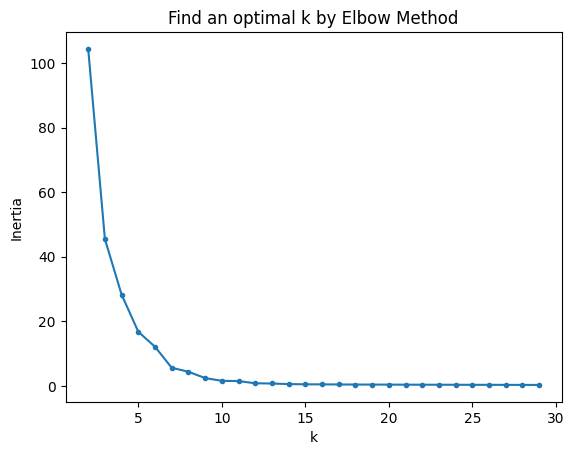

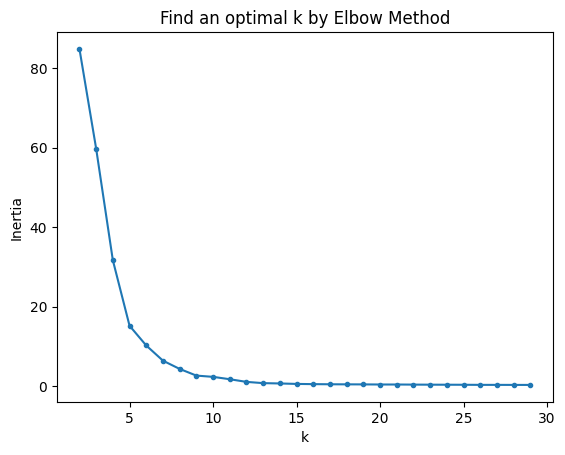

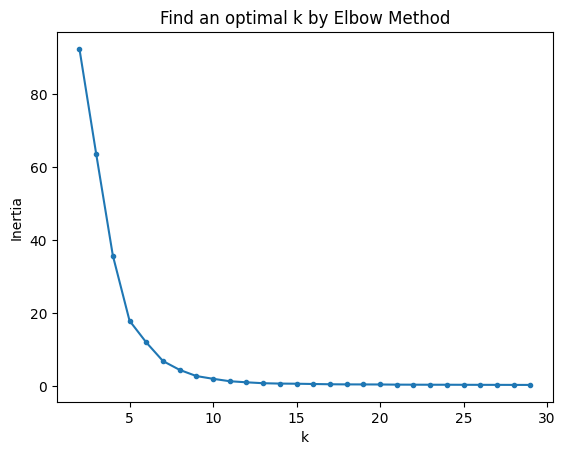

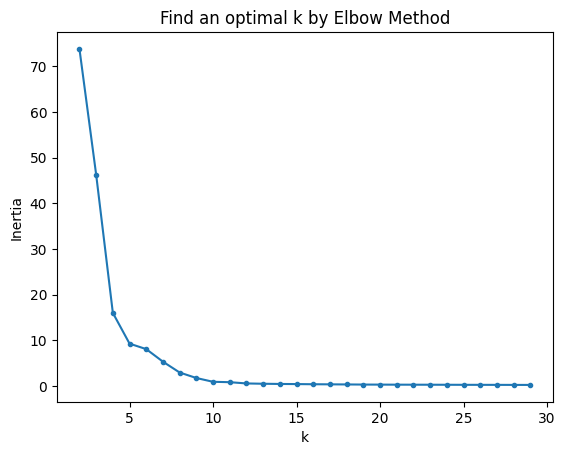

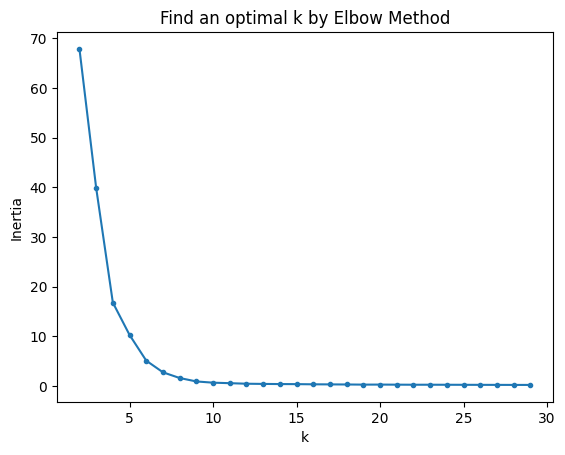

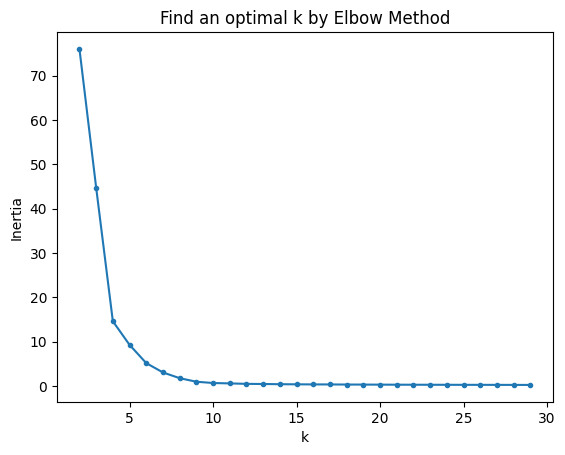

In [77]:
from sklearn.cluster import KMeans
# find the best k for K-Means alg
inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c10_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c20_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()
inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c30_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c40_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c50_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c60_N2_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

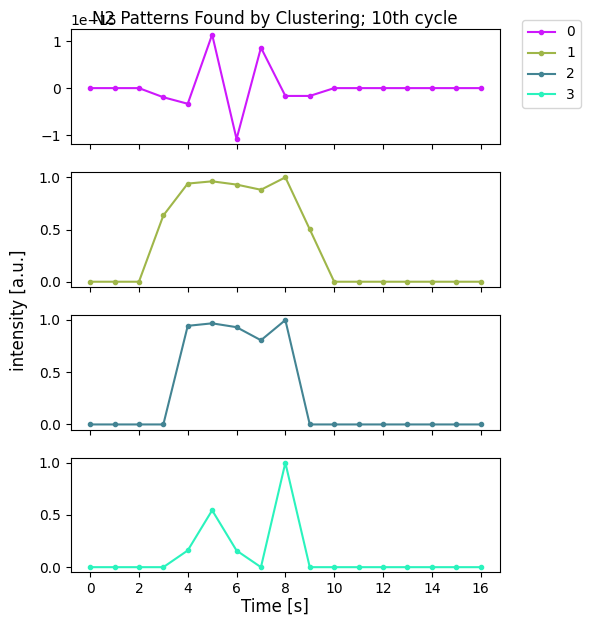

[1520, 402, 108, 18]


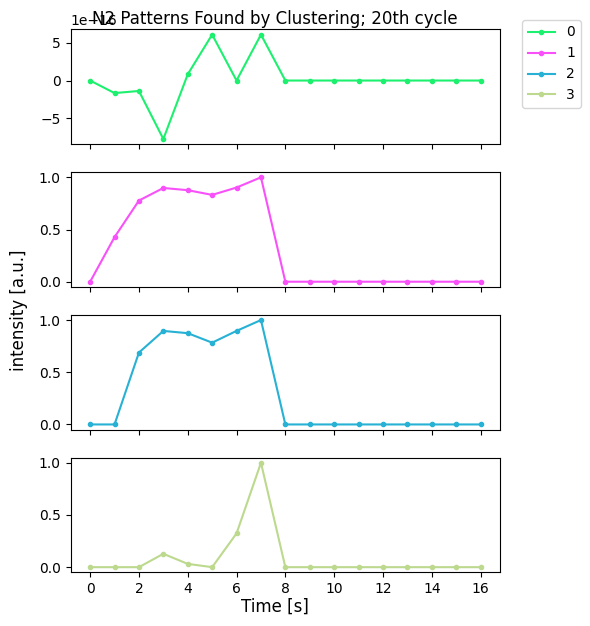

[1507, 288, 225, 28]


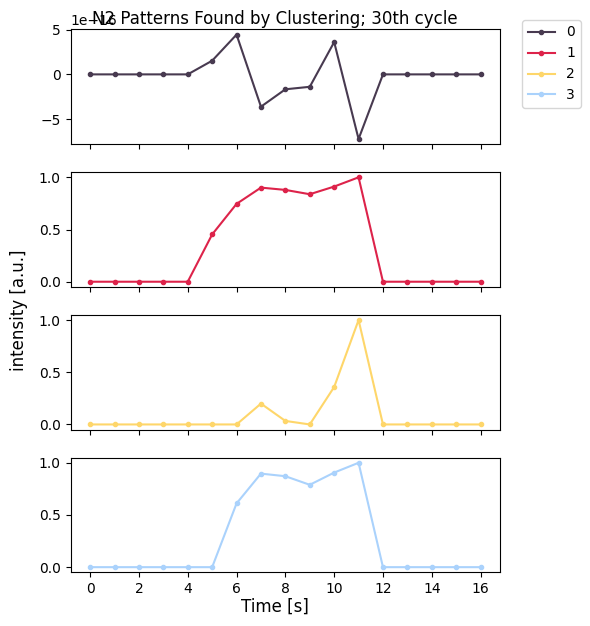

[1507, 305, 28, 208]


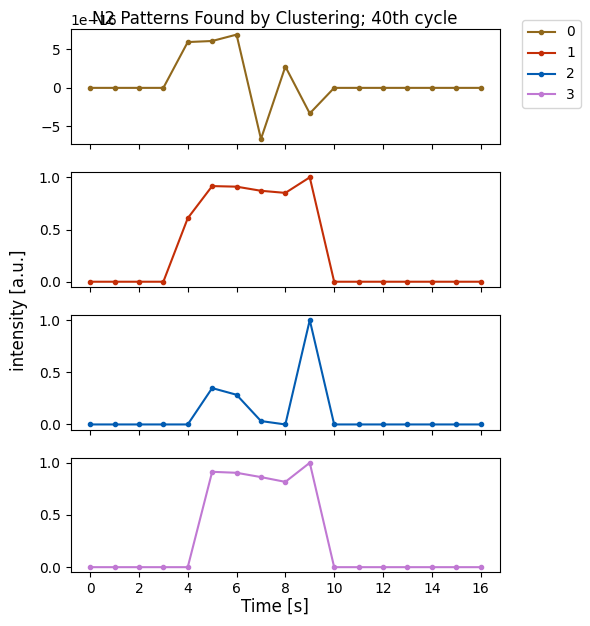

[1510, 407, 29, 102]


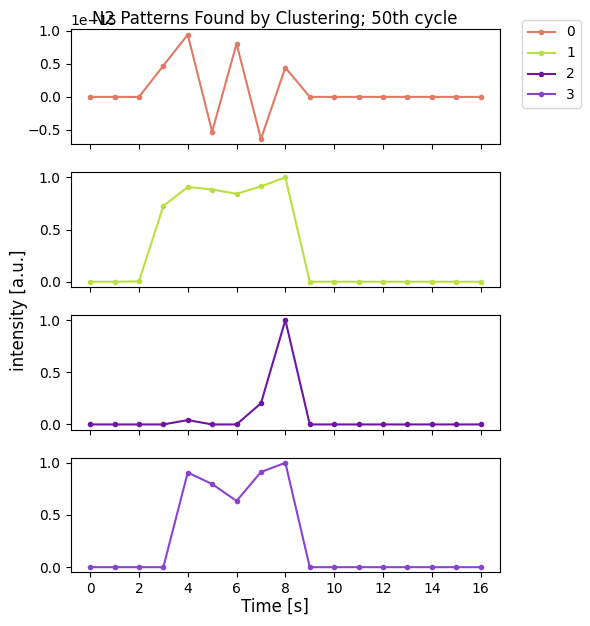

[1505, 467, 23, 53]


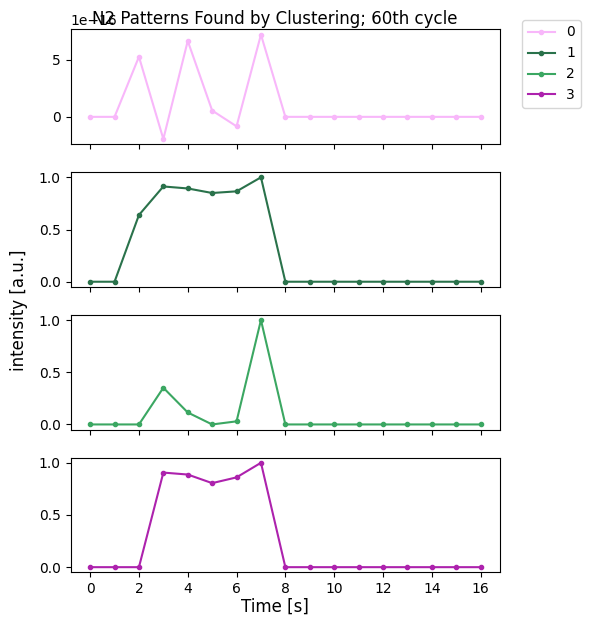

[1506, 422, 31, 89]


In [396]:
# set k
dfs = [c10_N2_scaled.T, c20_N2_scaled.T, c30_N2_scaled.T, c40_N2_scaled.T, c50_N2_scaled.T, c60_N2_scaled.T]
for idx2, val2 in enumerate(dfs):
    k = 4
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(val2)
    
    # random color generator
    import random
    random.seed(10*idx2)
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(5)]
    
    # colors
    label_color = colors

    # draw cluster centers
    fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
    fig.tight_layout(pad=1)
    for idx, val in enumerate(km.cluster_centers_):
        axs[idx].plot(val,'.-',color=label_color[idx])
        # axs[idx].text(1,10, f'{wv_labled[idx]}', fontsize = 10)
        
    fig.supxlabel('Time [s]', y=-0.01)
    fig.supylabel('intensity [a.u.]', x=-0.03)
    fig.suptitle(f'N2 Patterns Found by Clustering; {(idx2+1)*10}th cycle', y=1)
    fig.legend(set(km.labels_), bbox_to_anchor=(0.98, 0.995), loc='upper left')
    fig.savefig(f'file/process2/patterns_{(idx2+1)*10}th_N2.png', bbox_inches='tight')
    plt.show()

    # num of elements
    wv_labled = []
    for i in range(k): # k=5
        wv_labled.append(val2[km.labels_==i].index.tolist())
    print([len(i) for i in wv_labled])
    
    for i in range(1,k):
        pattern = pd.DataFrame([float(i) for i in wv_labled[i]])
        pattern.to_csv(f'file/process2/N2_{(idx2+1)*10}th_pattern{i}.csv')

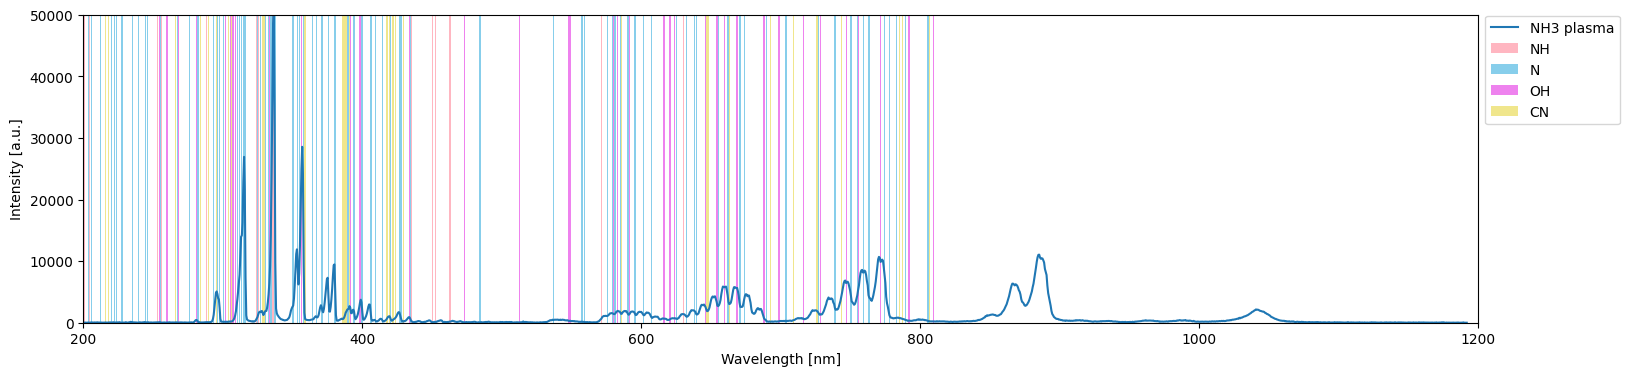

In [404]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_N2.iloc[5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 50000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 50000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.bar(CN['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='khaki', linewidth=1)
plt.xlim(200,1200)
plt.ylim(0,50000)
plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

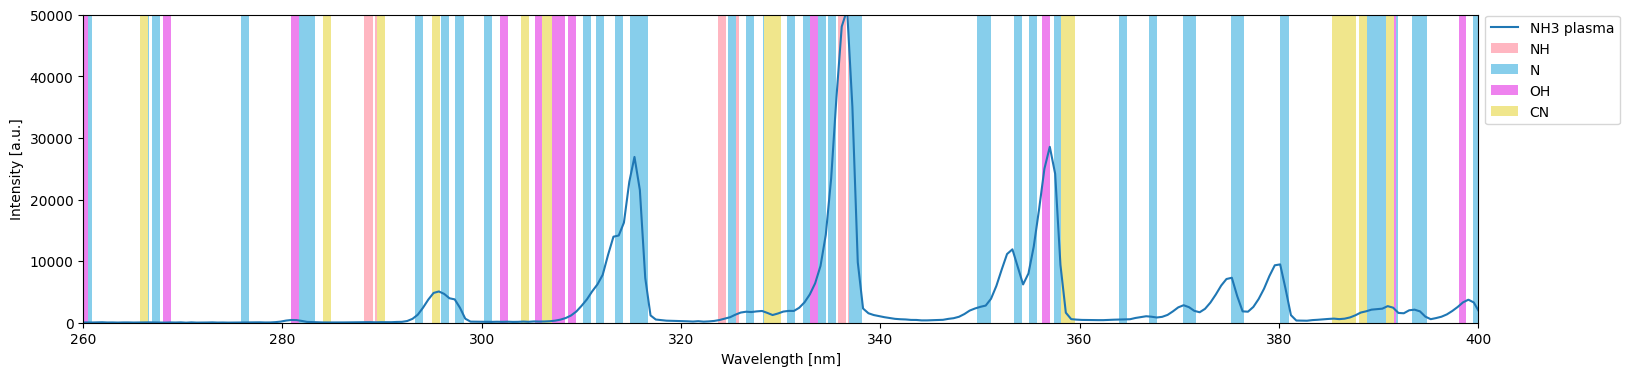

In [413]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_N2.iloc[5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 50000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 50000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.bar(CN['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='khaki', linewidth=1)
plt.xlim(260,400)
plt.ylim(0,50000)
plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

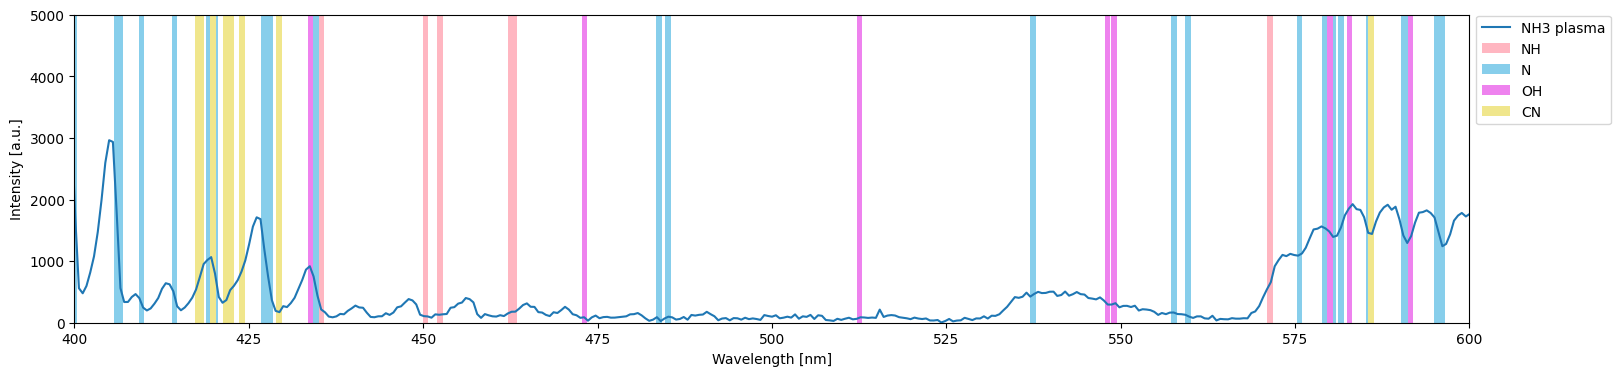

In [407]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_N2.iloc[5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 50000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 50000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.bar(CN['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='khaki', linewidth=1)
plt.xlim(400,600)
plt.ylim(0,5000)
plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

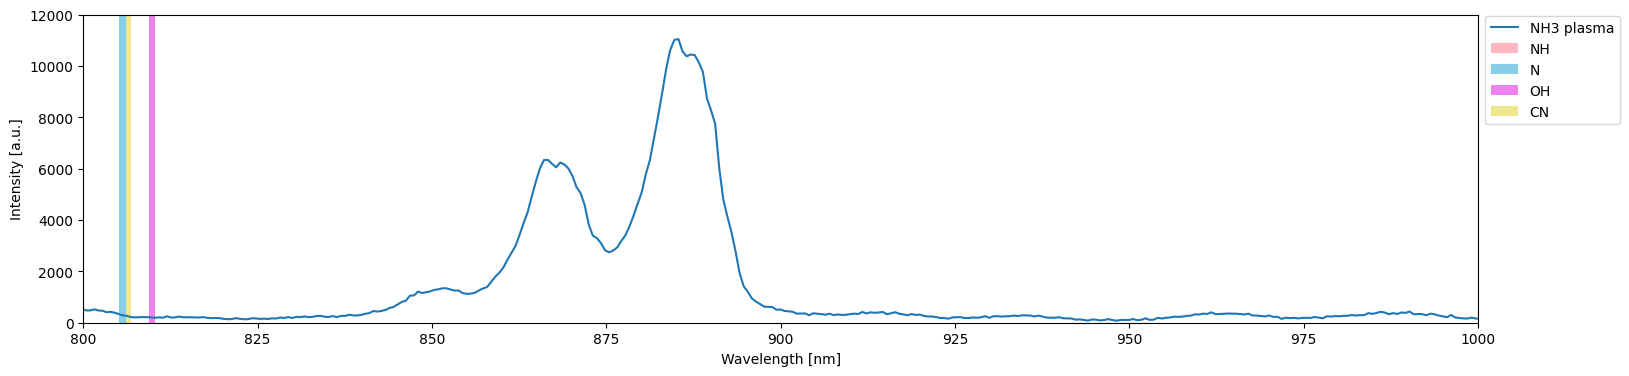

In [414]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_N2.iloc[5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 50000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 50000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.bar(CN['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='khaki', linewidth=1)
plt.xlim(800,1000)
plt.ylim(0,12000)
plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

In [ ]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_N2.iloc[5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 50000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 50000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.bar(CN['wavelength'].values+0.13, 50000*np.ones(len(OH['wavelength'].values)), color='khaki', linewidth=1)
plt.xlim(600,800)
plt.ylim(0,12000)
plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

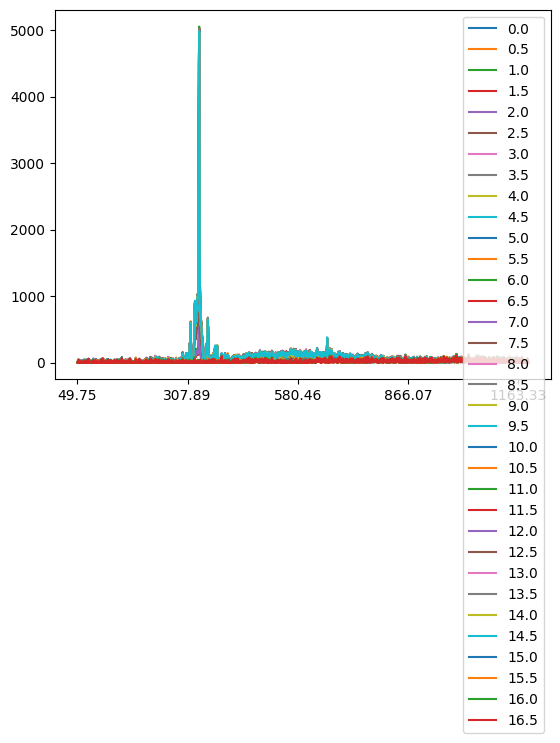

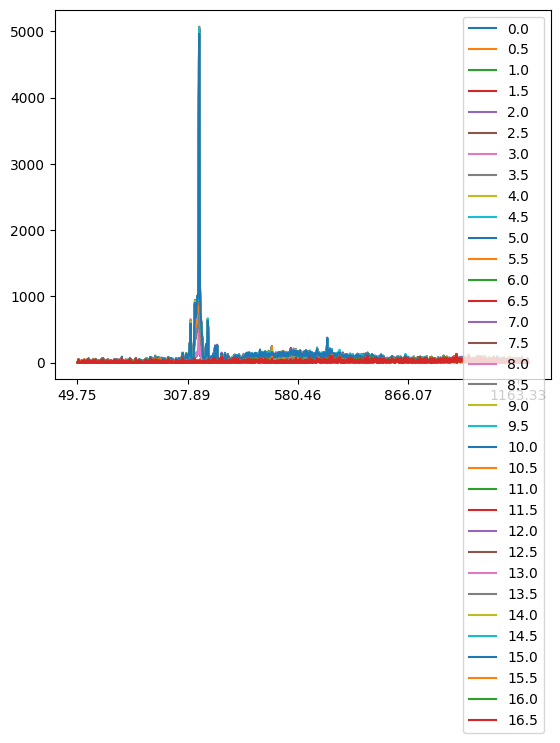

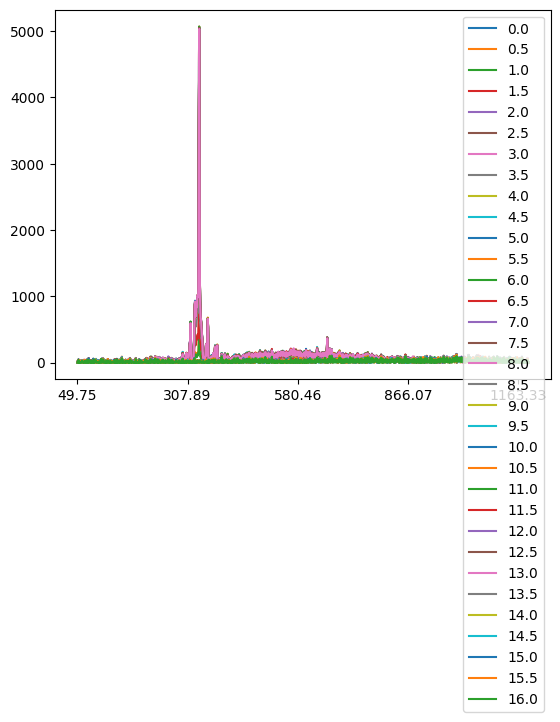

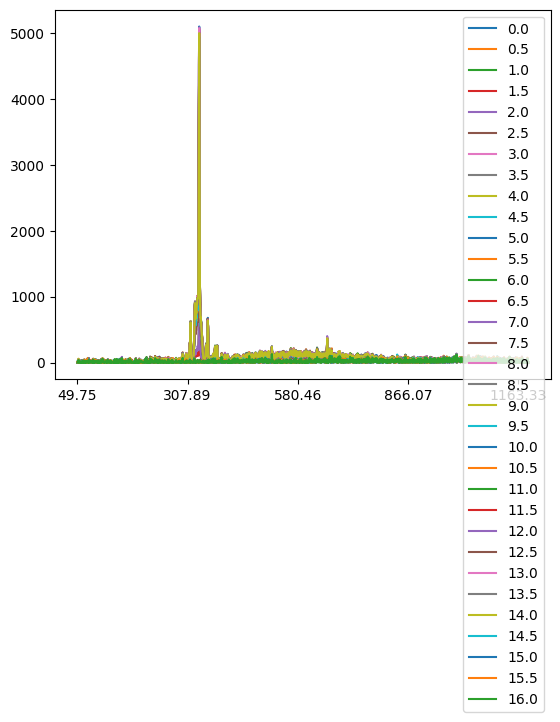

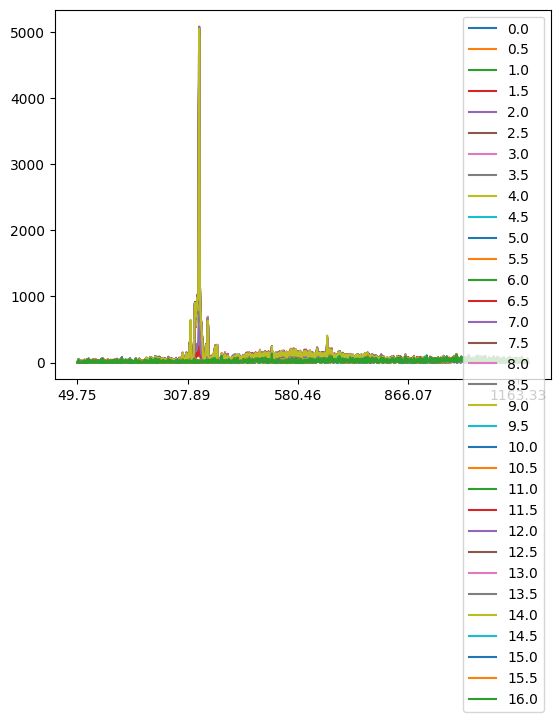

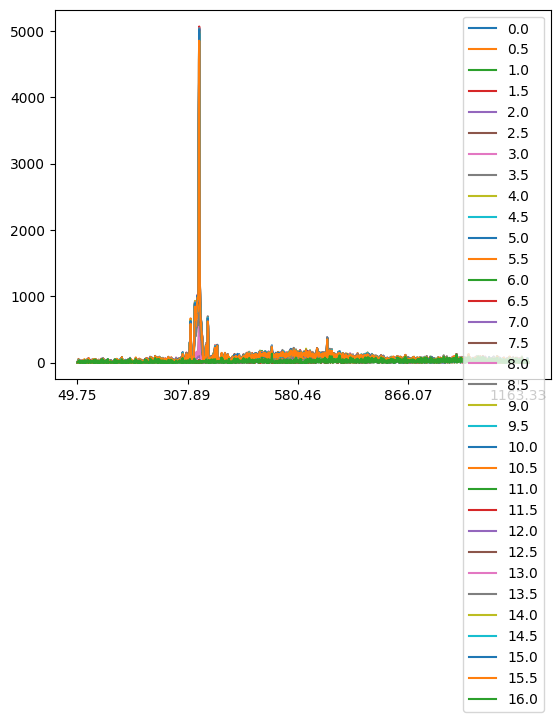

In [168]:
c10_NH3.index = [np.round(0.5*i,2) for i in range(len(c10_NH3))]
c10_NH3.T.plot(kind='line')
plt.show()

c20_NH3.index = [np.round(0.5*i,2) for i in range(len(c20_NH3))]
c20_NH3.T.plot(kind='line')
plt.show()

c30_NH3.index = [np.round(0.5*i,2) for i in range(len(c30_NH3))]
c30_NH3.T.plot(kind='line')
plt.show()

c40_NH3.index = [np.round(0.5*i,2) for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

c50_NH3.index = [np.round(0.5*i,2) for i in range(len(c50_NH3))]
c50_NH3.T.plot(kind='line')
plt.show()

c60_NH3.index = [np.round(0.5*i,2) for i in range(len(c60_NH3))]
c60_NH3.T.plot(kind='line')
plt.show()

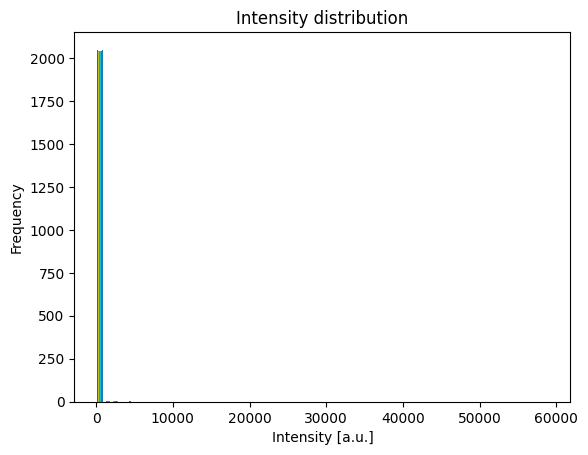

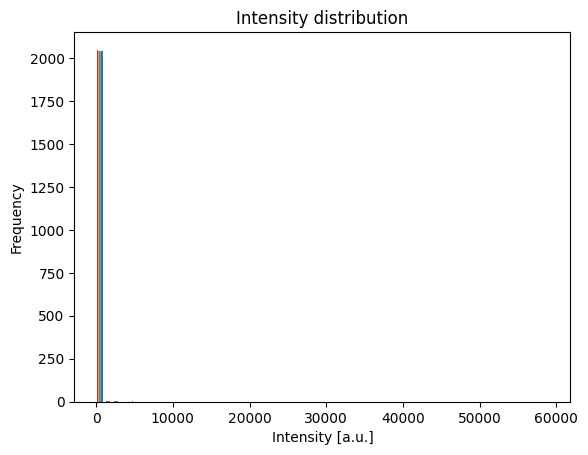

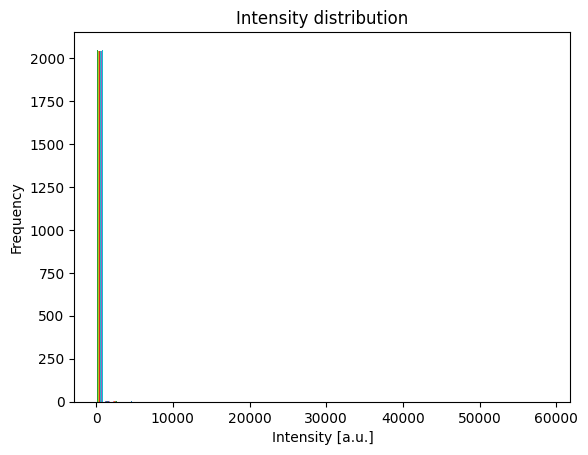

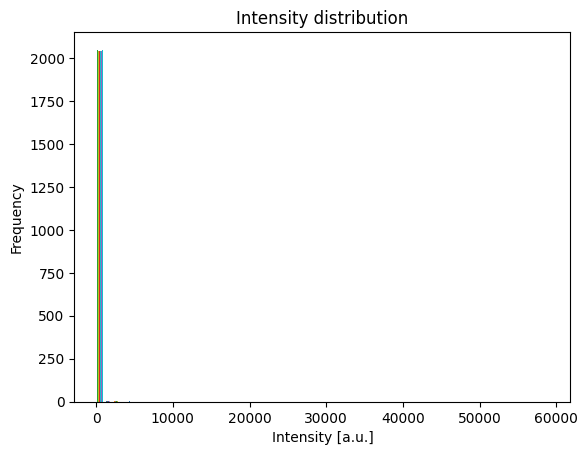

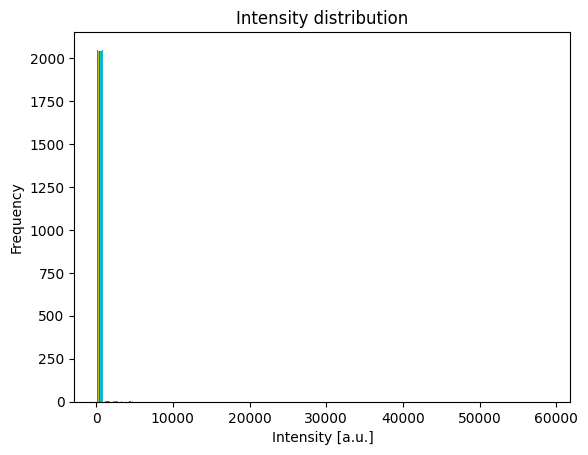

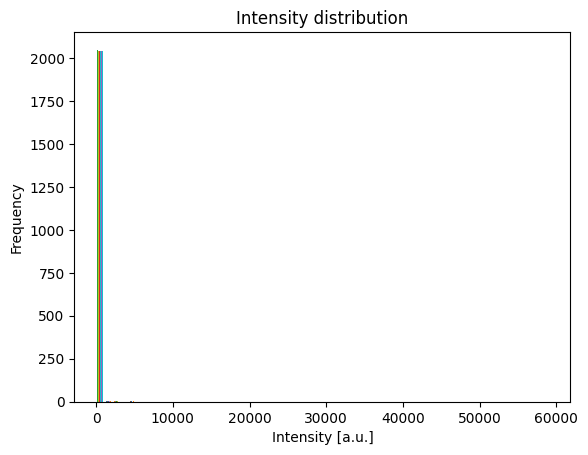

In [99]:
plt.hist(c10_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c20_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c30_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c40_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c50_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

plt.hist(c60_NH3.values.tolist(), bins=np.arange(0,60000,1000))
# plt.xlim(1000,20000)
# plt.ylim(0,250)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

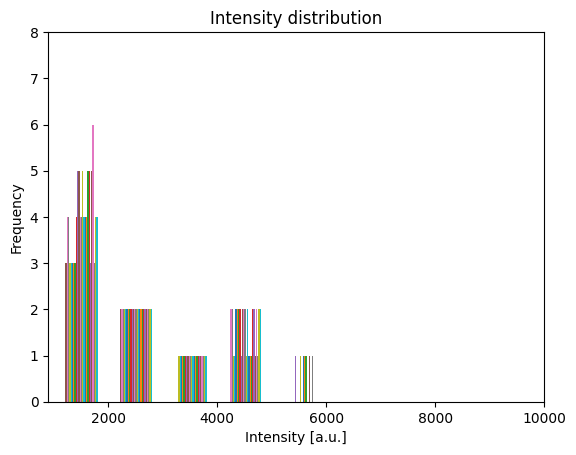

In [112]:
plt.hist(c10_NH3.values.tolist(), bins=np.arange(0,60000,1000))
plt.xlim(900,10000)
plt.ylim(0,8)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

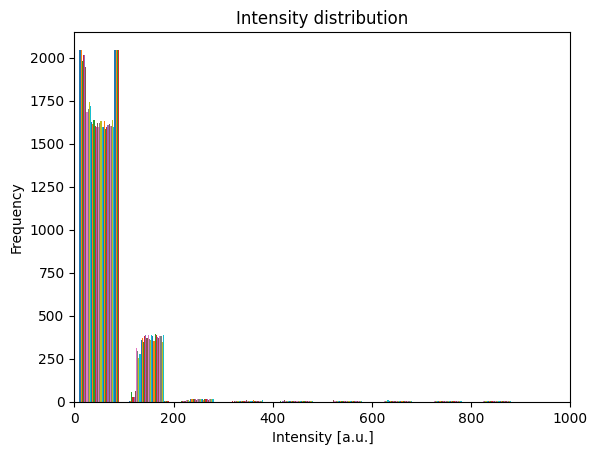

In [123]:
plt.hist(c10_NH3.values.tolist(), bins=np.arange(0,1000,100))
plt.xlim(0,1000)
# plt.ylim(0,8)
plt.title('Intensity distribution')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Frequency')
plt.show()

In [100]:
max_int = []
for i in range(len(c10_NH3.columns)):
    max_int.append(c10_NH3.iloc[:,i].max())
max_intensities = pd.DataFrame(max_int, index=c10_NH3.columns, columns=['cycle10'])

max_int = []
for i in range(len(c20_NH3.columns)):
    max_int.append(c20_NH3.iloc[:,i].max())
max_intensities['cycle20'] = max_int

max_int = []
for i in range(len(c30_NH3.columns)):
    max_int.append(c30_NH3.iloc[:,i].max())
max_intensities['cycle30'] = max_int

max_int = []
for i in range(len(c40_NH3.columns)):
    max_int.append(c40_NH3.iloc[:,i].max())
max_intensities['cycle40'] = max_int

max_int = []
for i in range(len(c50_NH3.columns)):
    max_int.append(c50_NH3.iloc[:,i].max())
max_intensities['cycle50'] = max_int

max_int = []
for i in range(len(c40_NH3.columns)):
    max_int.append(c40_NH3.iloc[:,i].max())
    
max_intensities['cycle60'] = max_int

max_intensities = max_intensities.sort_values(by=['cycle10', 'cycle20', 'cycle30', 'cycle40', 'cycle50', 'cycle60'], ascending=False)
max_intensities.to_csv('file/process2/max_intensities_NH3.csv')

In [507]:
# scaling and clustering
c10_NH3_scaled = c10_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c10_NH3_scaled.index)):
    for j in range(len(c10_NH3_scaled.columns)):
        if c10_NH3_scaled.iloc[i,j]<0:
            c10_NH3_scaled.iloc[i,j]=0
for i in range(len(c10_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c10_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c10_NH3_scaled.iloc[:,i] = mm.transform(np.array(c10_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c20_NH3_scaled = c20_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c20_NH3_scaled.index)):
    for j in range(len(c20_NH3_scaled.columns)):
        if c20_NH3_scaled.iloc[i,j]<0:
            c20_NH3_scaled.iloc[i,j]=0
for i in range(len(c20_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c20_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c20_NH3_scaled.iloc[:,i] = mm.transform(np.array(c20_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c30_NH3_scaled = c30_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c30_NH3_scaled.index)):
    for j in range(len(c30_NH3_scaled.columns)):
        if c30_NH3_scaled.iloc[i,j]<0:
            c30_NH3_scaled.iloc[i,j]=0
for i in range(len(c30_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c30_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c30_NH3_scaled.iloc[:,i] = mm.transform(np.array(c30_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()
    
c40_NH3_scaled = c40_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c40_NH3_scaled.index)):
    for j in range(len(c40_NH3_scaled.columns)):
        if c40_NH3_scaled.iloc[i,j]<0:
            c40_NH3_scaled.iloc[i,j]=0
for i in range(len(c40_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c40_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c40_NH3_scaled.iloc[:,i] = mm.transform(np.array(c40_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

c50_NH3_scaled = c50_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c50_NH3_scaled.index)):
    for j in range(len(c50_NH3_scaled.columns)):
        if c50_NH3_scaled.iloc[i,j]<0:
            c50_NH3_scaled.iloc[i,j]=0
for i in range(len(c50_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c50_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c50_NH3_scaled.iloc[:,i] = mm.transform(np.array(c50_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()
    
c60_NH3_scaled = c60_NH3.copy()
# nulify values less than 0
# absolute
for i in range(len(c60_NH3_scaled.index)):
    for j in range(len(c60_NH3_scaled.columns)):
        if c60_NH3_scaled.iloc[i,j]<0:
            c60_NH3_scaled.iloc[i,j]=0
for i in range(len(c60_NH3_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(c60_NH3_scaled.iloc[:,i].values).reshape(-1,1))
    c60_NH3_scaled.iloc[:,i] = mm.transform(np.array(c60_NH3_scaled.iloc[:,i].values).reshape(-1,1)).flatten()

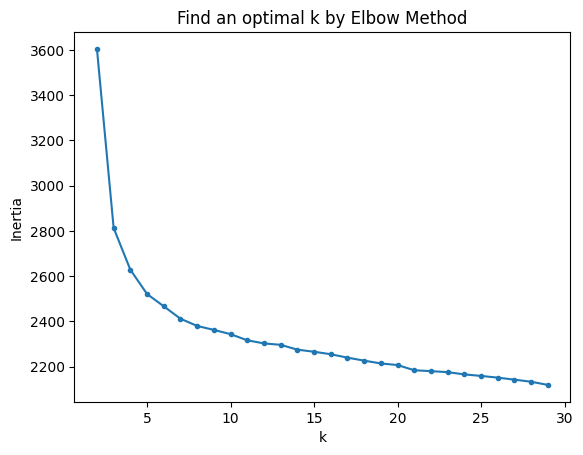

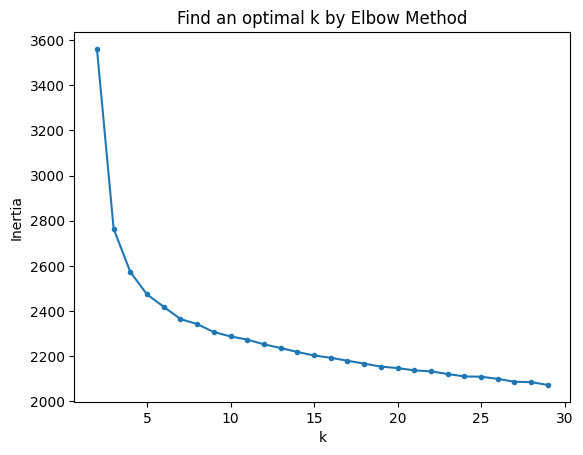

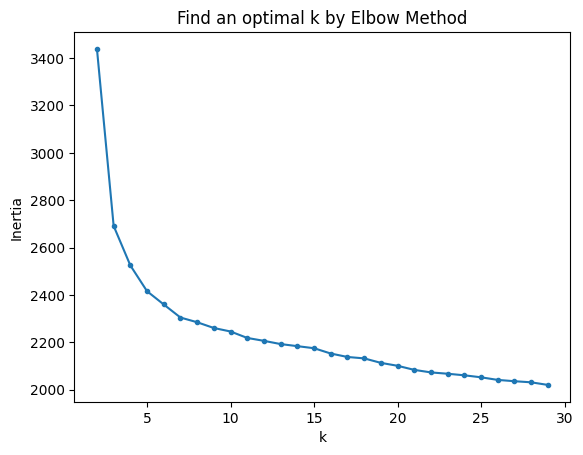

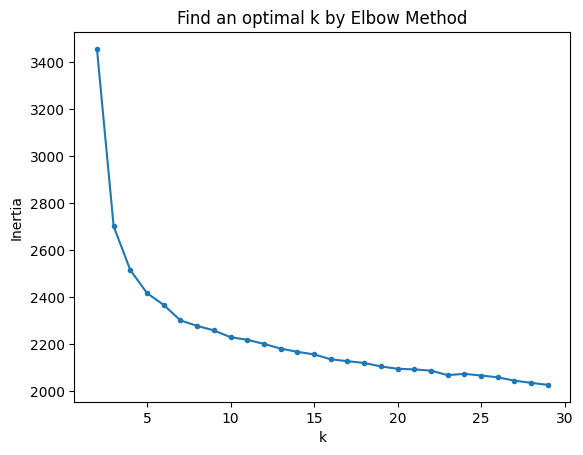

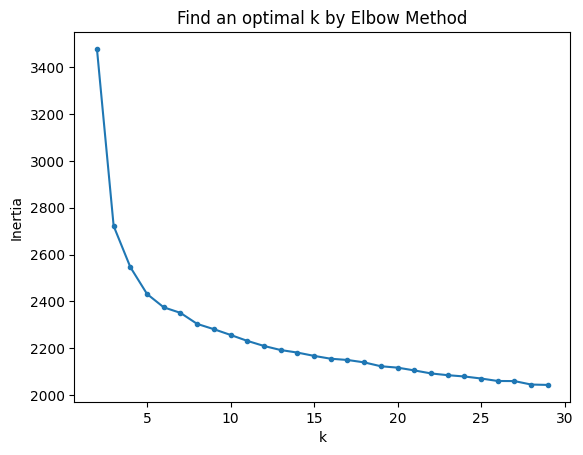

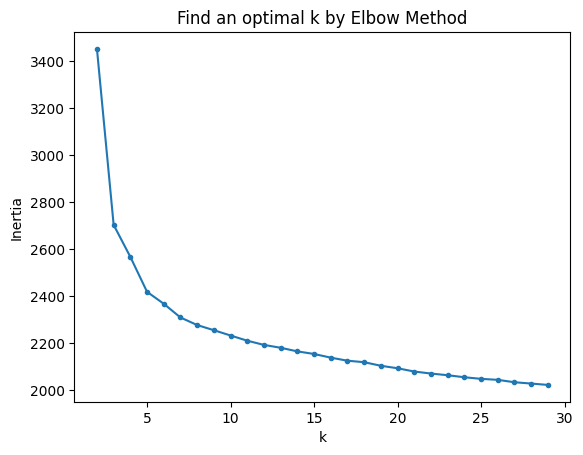

In [508]:
from sklearn.cluster import KMeans
# find the best k for K-Means alg
inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c10_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c20_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()
inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c30_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c40_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c50_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

inertia = []
for k in range(2,30):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(c60_NH3_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,30),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

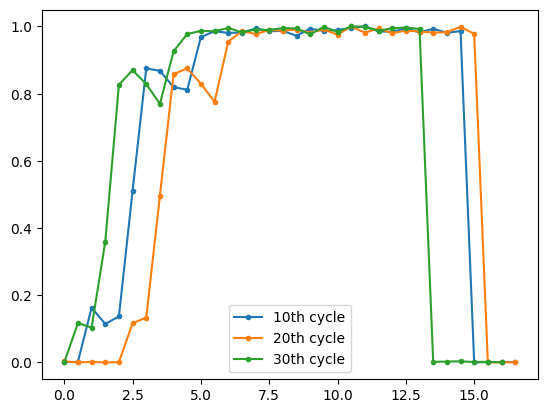

In [509]:
plt.plot(c10_NH3_scaled['336.13'],'.-', label='10th cycle')
plt.plot(c20_NH3_scaled['336.13'],'.-', label='20th cycle')
plt.plot(c30_NH3_scaled['336.13'],'.-', label='30th cycle')
plt.legend()
plt.show()

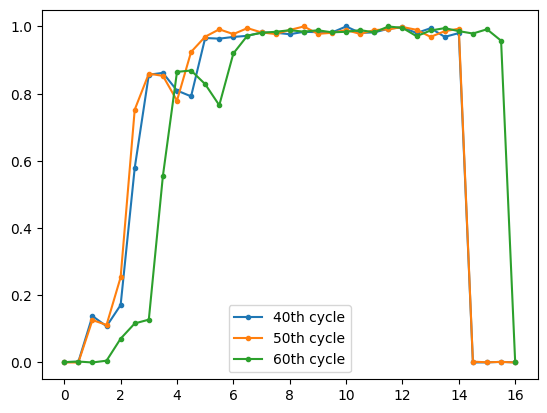

In [510]:
plt.plot(c40_NH3_scaled['336.13'],'.-', label='40th cycle')
plt.plot(c50_NH3_scaled['336.13'],'.-', label='50th cycle')
plt.plot(c60_NH3_scaled['336.13'],'.-', label='60th cycle')
plt.legend()
plt.show()

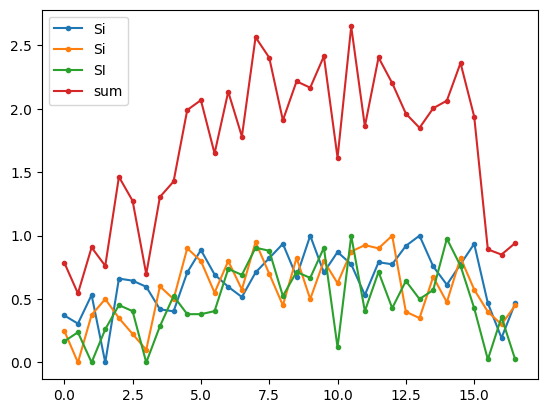

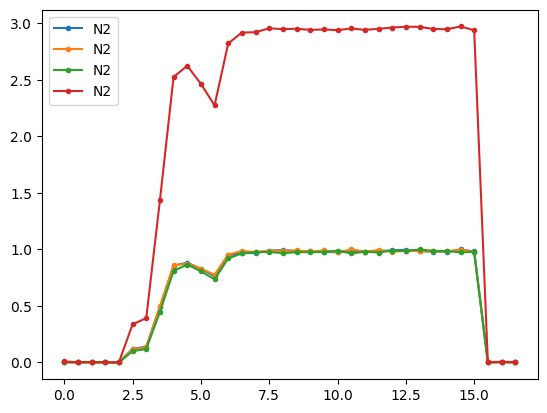

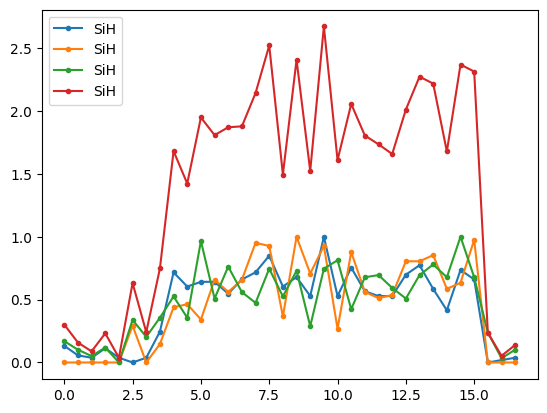

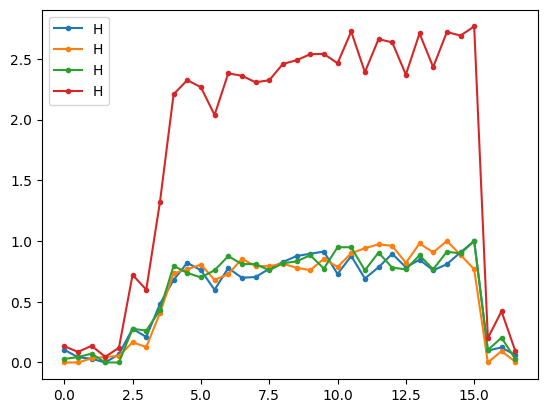

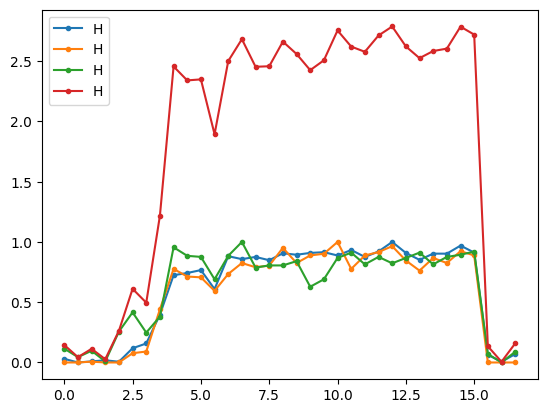

In [511]:
# plt.plot(c20_NH3_scaled['336.13'],'.-', label='N2')
# Si
plt.plot(c20_NH3_scaled['287.76'],'.-', label='Si')
plt.plot(c20_NH3_scaled['288.29'],'.-', label='Si')
plt.plot(c20_NH3_scaled['288.82'],'.-', label='SI')
plt.plot(c20_NH3_scaled['287.76']+c20_NH3_scaled['288.29']+c20_NH3_scaled['288.82'],'.-', label='sum')
# plt.plot((c20_NH3_scaled['287.76']+c20_NH3_scaled['288.29']+c20_NH3_scaled['288.82'])/3,'.-', label='mean')
plt.legend()
plt.show()
# NH
plt.plot(c20_NH3_scaled['335.6'],'.-', label='N2')
plt.plot(c20_NH3_scaled['336.13'],'.-', label='N2')
plt.plot(c20_NH3_scaled['336.67'],'.-', label='N2')
plt.plot(c20_NH3_scaled['335.6']+c20_NH3_scaled['336.13']+c20_NH3_scaled['336.67'],'.-', label='N2')
plt.legend()
plt.show()
# SiH
plt.plot(c20_NH3_scaled['413.65'],'.-', label='SiH')
plt.plot(c20_NH3_scaled['414.19'],'.-', label='SiH')
plt.plot(c20_NH3_scaled['414.73'],'.-', label='SiH')
plt.plot(c20_NH3_scaled['413.65']+c20_NH3_scaled['414.19']+c20_NH3_scaled['414.73'],'.-', label='SiH')
plt.legend()
plt.show()
# H_a 486
plt.plot(c20_NH3_scaled['485.71'],'.-', label='H')
plt.plot(c20_NH3_scaled['486.26'],'.-', label='H')
plt.plot(c20_NH3_scaled['486.81'],'.-', label='H')
plt.plot(c20_NH3_scaled['485.71']+c20_NH3_scaled['486.26']+c20_NH3_scaled['486.81'],'.-', label='H')
plt.legend()
plt.show()
# H_a 656
plt.plot(c20_NH3_scaled['656.35'],'.-', label='H')
plt.plot(c20_NH3_scaled['656.91'],'.-', label='H')
plt.plot(c20_NH3_scaled['657.48'],'.-', label='H')
plt.plot(c20_NH3_scaled['656.35']+c20_NH3_scaled['656.91']+c20_NH3_scaled['657.48'],'.-', label='H')
plt.legend()
plt.show()

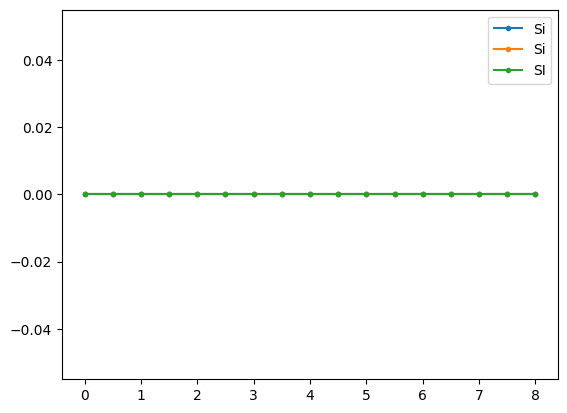

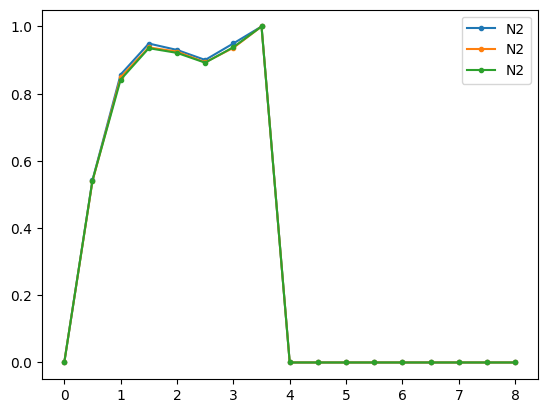

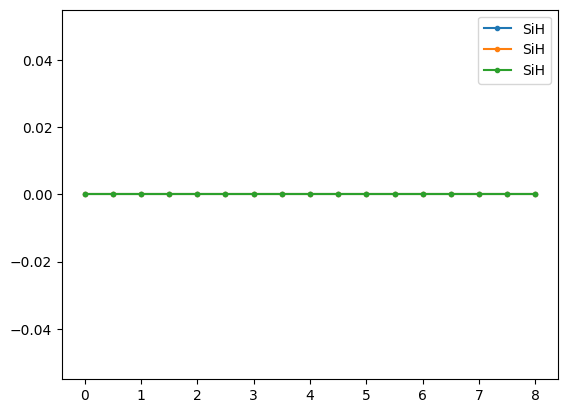

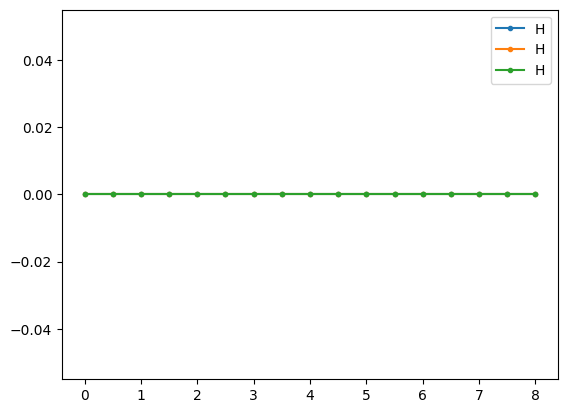

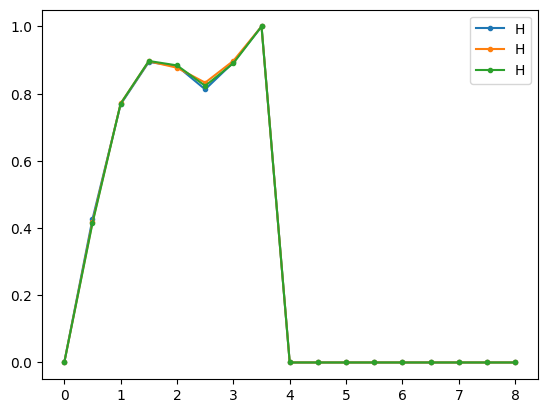

In [519]:
# plt.plot(c20_N2_scaled['336.13'],'.-', label='N2')
# Si
plt.plot(c20_N2_scaled['287.76'],'.-', label='Si')
plt.plot(c20_N2_scaled['288.29'],'.-', label='Si')
plt.plot(c20_N2_scaled['288.82'],'.-', label='SI')
# plt.plot(c20_N2_scaled['287.76']+c20_N2_scaled['288.29']+c20_N2_scaled['288.82'],'.-', label='sum')
# plt.plot((c20_N2_scaled['287.76']+c20_N2_scaled['288.29']+c20_N2_scaled['288.82'])/3,'.-', label='mean')
plt.legend()
plt.show()
# NH
plt.plot(c20_N2_scaled['335.6'],'.-', label='N2')
plt.plot(c20_N2_scaled['336.13'],'.-', label='N2')
plt.plot(c20_N2_scaled['336.67'],'.-', label='N2')
# plt.plot(c20_N2_scaled['335.6']+c20_N2_scaled['336.13']+c20_N2_scaled['336.67'],'.-', label='N2')
plt.legend()
plt.show()
# SiH
plt.plot(c20_N2_scaled['413.65'],'.-', label='SiH')
plt.plot(c20_N2_scaled['414.19'],'.-', label='SiH')
plt.plot(c20_N2_scaled['414.73'],'.-', label='SiH')
# plt.plot(c20_N2_scaled['413.65']+c20_N2_scaled['414.19']+c20_N2_scaled['414.73'],'.-', label='SiH')
plt.legend()
plt.show()
# H_a 486
plt.plot(c20_N2_scaled['485.71'],'.-', label='H')
plt.plot(c20_N2_scaled['486.26'],'.-', label='H')
plt.plot(c20_N2_scaled['486.81'],'.-', label='H')
# plt.plot(c20_N2_scaled['485.71']+c20_N2_scaled['486.26']+c20_N2_scaled['486.81'],'.-', label='H')
plt.legend()
plt.show()
# H_a 656
plt.plot(c20_N2_scaled['656.35'],'.-', label='H')
plt.plot(c20_N2_scaled['656.91'],'.-', label='H')
plt.plot(c20_N2_scaled['657.48'],'.-', label='H')
# plt.plot(c20_N2_scaled['656.35']+c20_N2_scaled['656.91']+c20_N2_scaled['657.48'],'.-', label='H')
plt.legend()
plt.show()

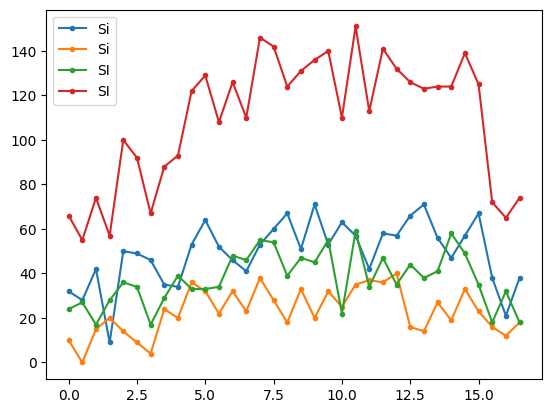

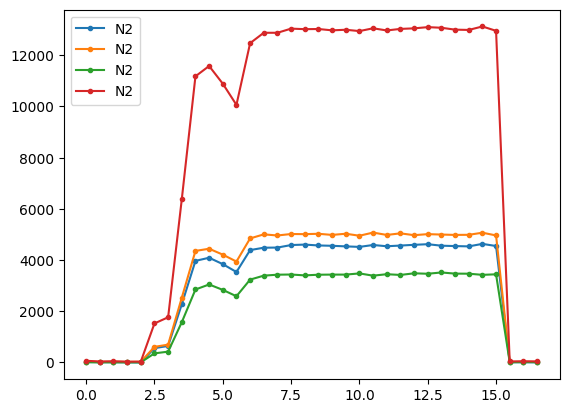

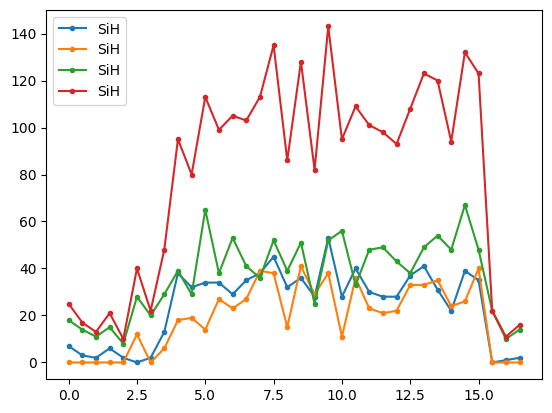

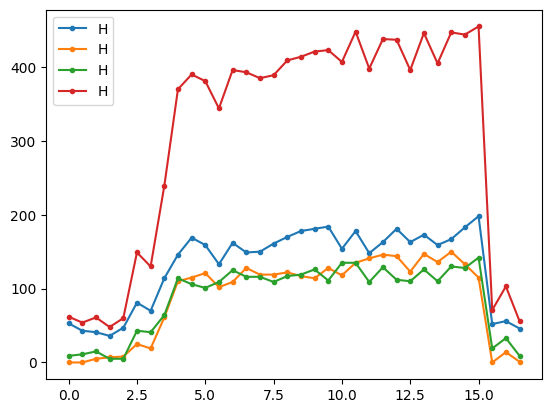

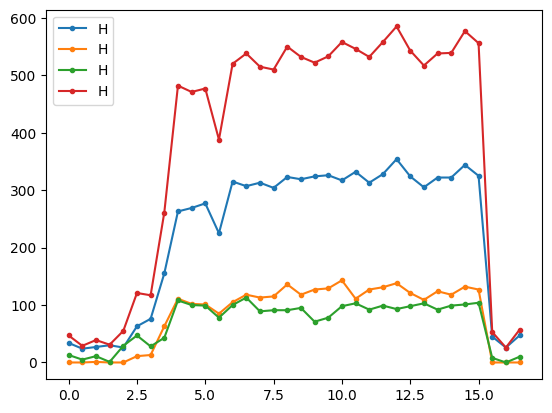

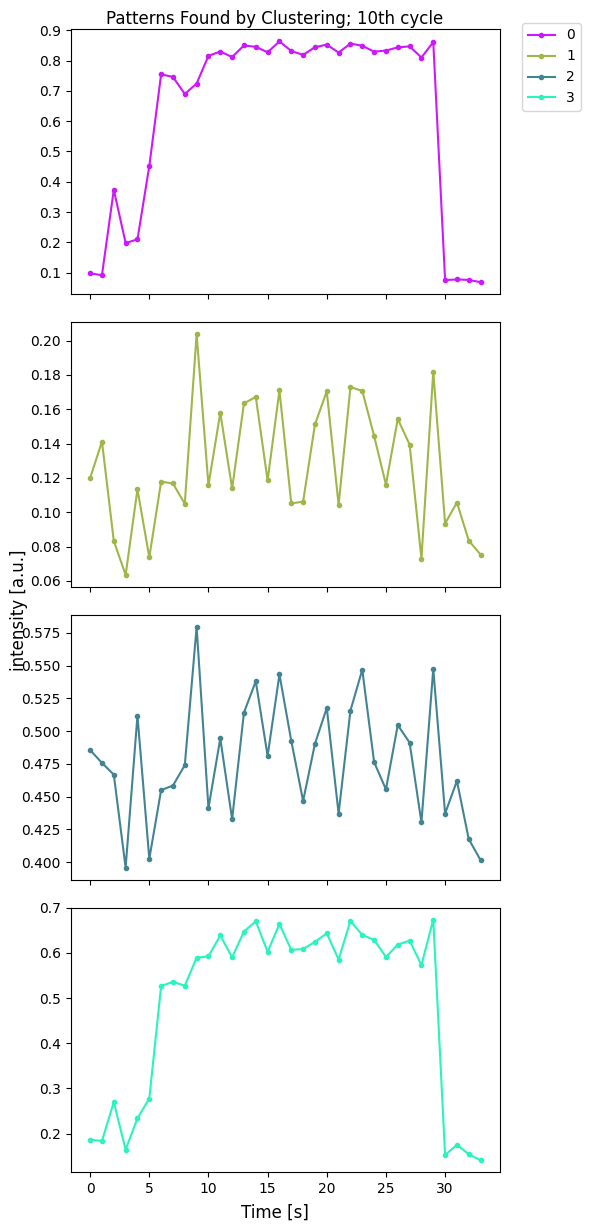

[803, 277, 544, 424]


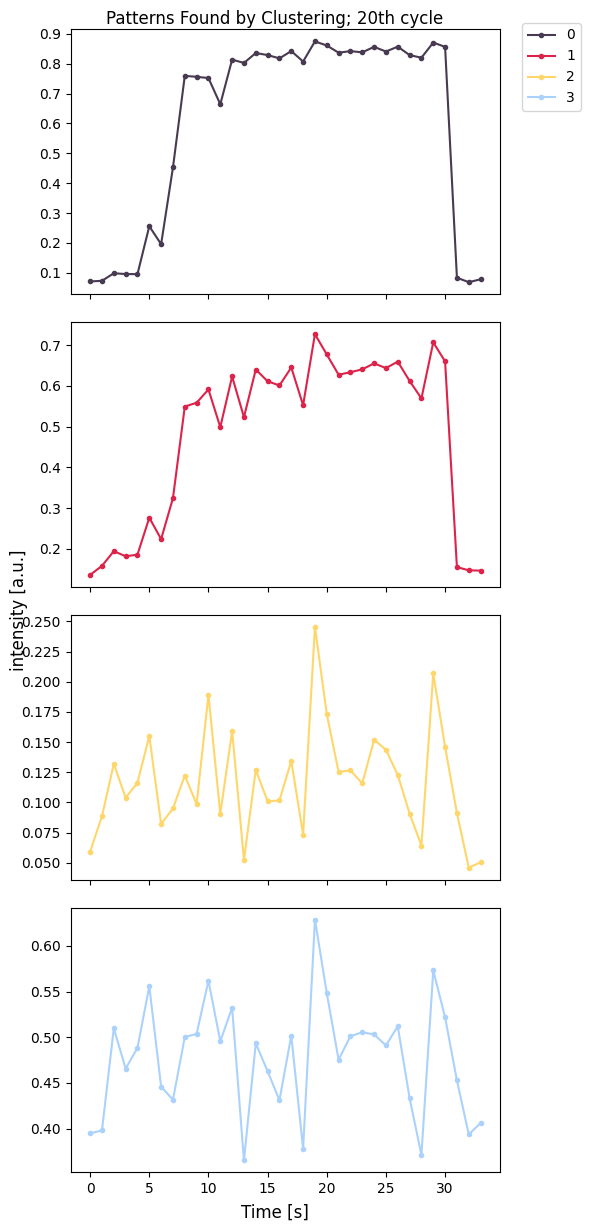

[772, 463, 266, 547]


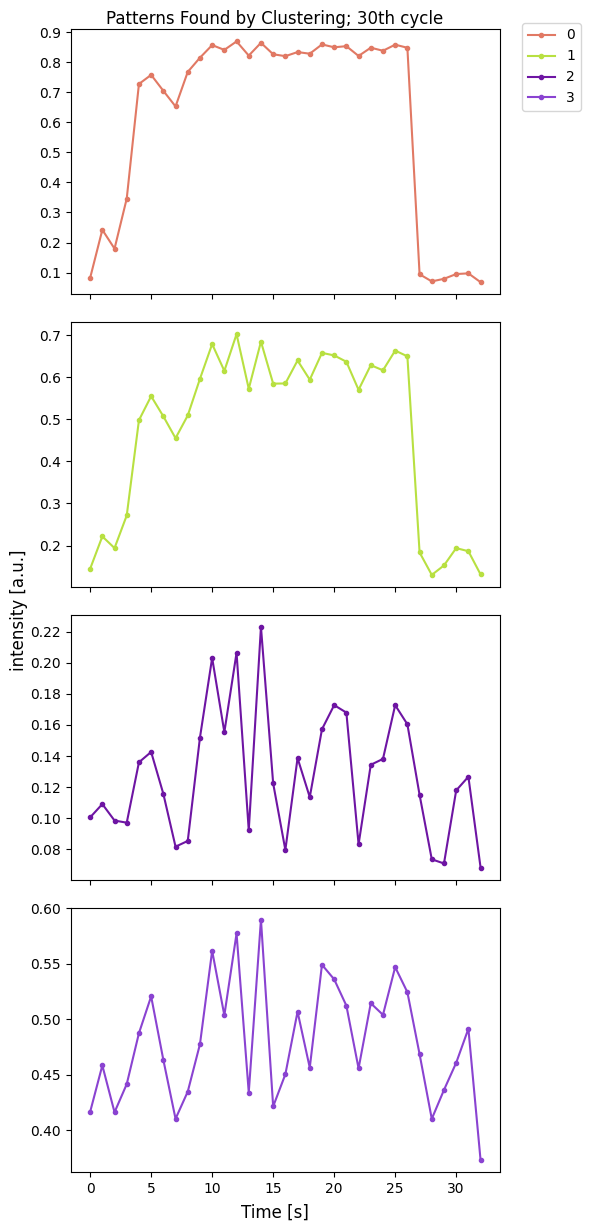

[805, 431, 274, 538]


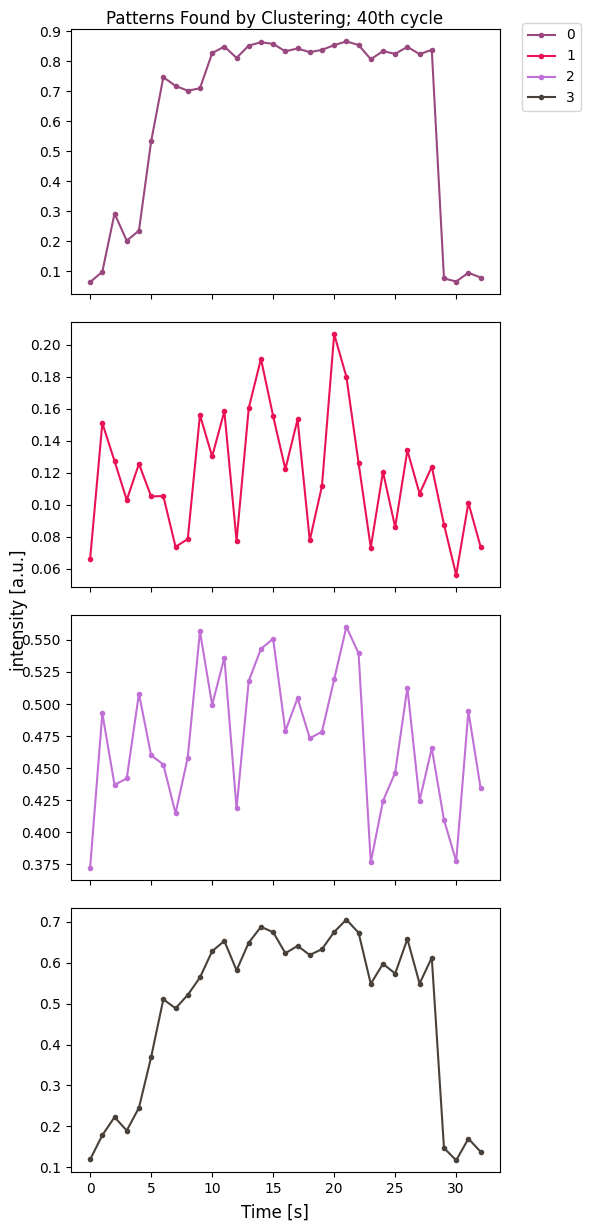

[783, 269, 551, 445]


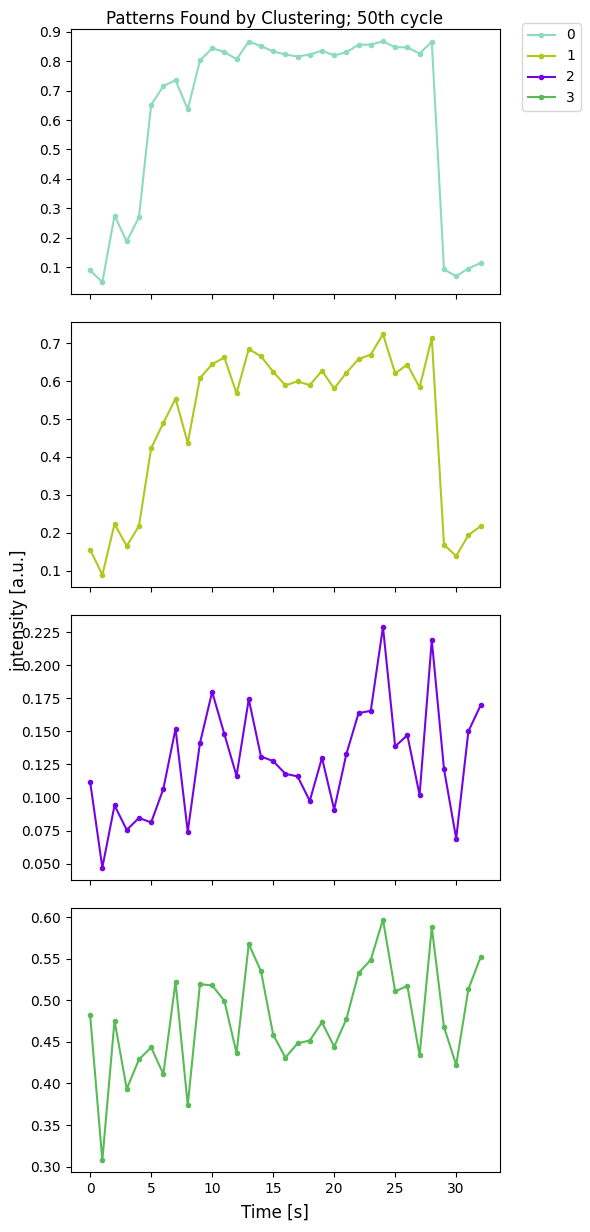

[783, 430, 281, 554]


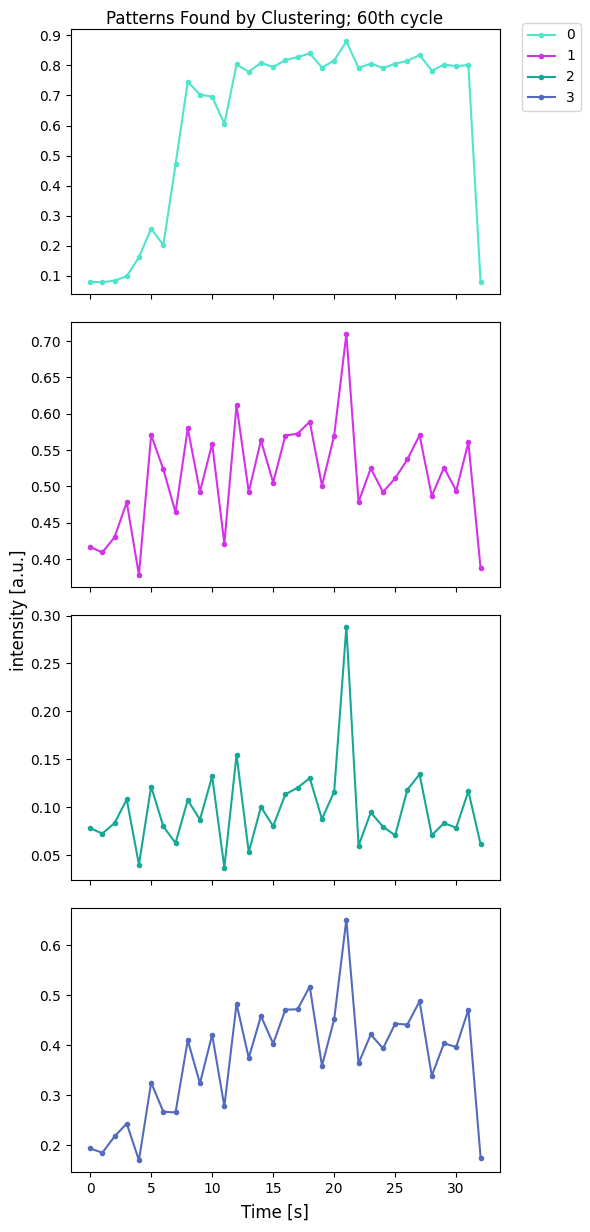

[966, 519, 229, 334]


In [514]:
# set k
dfs = [c10_NH3_scaled.T, c20_NH3_scaled.T, c30_NH3_scaled.T, c40_NH3_scaled.T, c50_NH3_scaled.T, c60_NH3_scaled.T]
for idx2, val2 in enumerate(dfs):
    k = 4
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(val2)
    
    # random color generator
    import random
    random.seed(20*idx2)
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(k)]
    
    # colors
    label_color = colors
    
    # draw cluster centers
    fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,12))
    fig.tight_layout(pad=1)
    for idx, val in enumerate(km.cluster_centers_):
        axs[idx].plot(val,'.-',color=label_color[idx])
        
    fig.supxlabel('Time [s]', y=-0.01)
    fig.supylabel('intensity [a.u.]', x=-0.03)
    fig.suptitle(f'Patterns Found by Clustering; {(idx2+1)*10}th cycle', y=1)
    fig.legend(set(km.labels_), bbox_to_anchor=(0.98, 0.995), loc='upper left')
    # fig.savefig(f'file/process2/patterns_{(idx2+1)*10}th_NH3.png', bbox_inches='tight')
    plt.show()

    wv_labled = []
    for i in range(k): # k=6
        wv_labled.append(val2[km.labels_==i].index.tolist())
        
    print([len(i) for i in wv_labled])

    for i in range(1,k):
        pattern = pd.DataFrame([float(i) for i in wv_labled[i]])
        # pattern.to_csv(f'file/process2/NH3_{(idx2+1)*10}th_pattern{i}.csv')

In [361]:
ref = pd.read_excel('file/etc/emission_spectrum.xlsx')
print(ref['name'].unique())
ref.head()

['SiN' 'Si2' 'Si' 'NH3' 'NH2' 'NH+' 'NH' 'N2+' 'N2' 'HCl' 'H2O' 'H' 'Cl2'
 'Cl+' 'Cl' 'Ar+' 'Ar' 'OH' 'OH+' 'N2O' 'NO' 'NO2' 'NO3' 'O' 'O2' 'O2+'
 'CN' 'CN+' 'CN2' 'C' 'C2' 'C2H2' 'C2H5' 'C2N' 'C2O' 'C3' 'C3H3' 'C4H2'
 'C6H6' 'CH' 'CH+' 'CH2O' 'CH3' 'CH3O' 'CHO' 'CO' 'CO+' 'CO2' 'CO2+' 'NCl'
 'NCO' 'SiC2' 'SiCl' 'SiH' 'HNO2']


name  wavelength
0  SiN       353.5
1  SiN       404.8
2  SiN       405.1
3  SiN       408.0
4  SiN       408.7

In [385]:
pd.DataFrame(ref['name'].unique(), columns=['name']).to_csv('file/process2/mol_names.csv')

In [364]:
# atomic
Si = ref[(ref['name']=='Si')|(ref['name']=='Si2')].reset_index(drop=True)
Cl = ref[(ref['name']=='Cl2')|(ref['name']=='Cl+')|(ref['name']=='Cl')].reset_index(drop=True)
NH = ref[(ref['name']=='NH3')|(ref['name']=='NH2')|(ref['name']=='NH+')|(ref['name']=='NH')].reset_index(drop=True)
N = ref[(ref['name']=='N2+')|(ref['name']=='N2')].reset_index(drop=True)
Ar = ref[(ref['name']=='Ar')|(ref['name']=='Ar+')].reset_index(drop=True)
O = ref[(ref['name']=='O')|(ref['name']=='O2')|(ref['name']=='O2+')].reset_index(drop=True)
C = ref[(ref['name']=='C')|(ref['name']=='C2')|(ref['name']=='C3')].reset_index(drop=True)

# diatomic
SiN = ref[(ref['name']=='SiN')].reset_index(drop=True)
SiCl = ref[(ref['name']=='SiCl')].reset_index(drop=True)
SiC = ref[(ref['name']=='SiC')].reset_index(drop=True)
SiH = ref[(ref['name']=='SiH')].reset_index(drop=True)
HCl = ref[(ref['name']=='HCl')].reset_index(drop=True)
NCl = ref[(ref['name']=='NCl')].reset_index(drop=True)
OH = ref[(ref['name']=='H2O')|(ref['name']=='OH')|(ref['name']=='OH+')].reset_index(drop=True)
NO = ref[(ref['name']=='NO')|(ref['name']=='NO2')|(ref['name']=='NO3')|(ref['name']=='N2O')].reset_index(drop=True)
CN = ref[(ref['name']=='CN')|(ref['name']=='CN+')|(ref['name']=='CN2')].reset_index(drop=True)
CH = ref[(ref['name']=='C2H2')|(ref['name']=='C2H5')|(ref['name']=='C3H3')|(ref['name']=='C4H2')|(ref['name']=='C6H6')|(ref['name']=='CH')|(ref['name']=='CH+')].reset_index(drop=True)
CO = ref[(ref['name']=='CO')|(ref['name']=='CO+')|(ref['name']=='CO2')|(ref['name']=='CO2+')|(ref['name']=='C2O')].reset_index(drop=True)
CHO = ref[(ref['name']=='CHO')|(ref['name']=='CH3O')].reset_index(drop=True)
NCO = ref[(ref['name']=='NCO')].reset_index(drop=True)
HNO2 = ref[(ref['name']=='HNO2')].reset_index(drop=True)

molecules = [Si, Cl, NH, N, Ar, O, C, SiN, SiCl, SiC, HCl, NCl, OH, NO, CN, CH, CO, CHO, NCO, HNO2]
mol1 = [Si, Cl, N, Ar, O, C]
mol2 = [NH, SiN, SiCl, SiC, SiH, HCl, NCl, OH, NO, CN, CH]
mol3 = [CHO, NCO, HNO2]

In [370]:
random.seed(1)
color1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(mol1))]
random.seed(2)
color2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(mol2))]
random.seed(3)
color3 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(mol3))]

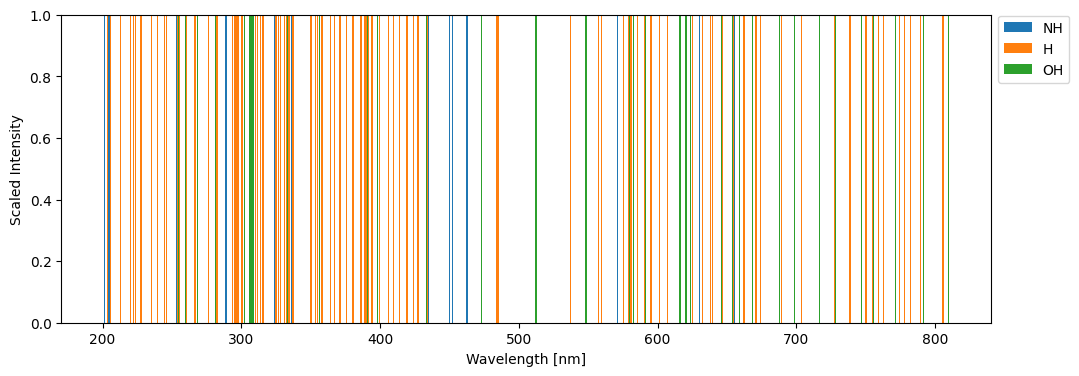

In [371]:
plt.figure(figsize=(12,4))
plt.bar(NH['wavelength'].values, np.ones(len(NH['wavelength'].values)))
plt.bar(N['wavelength'].values, np.ones(len(N['wavelength'].values)))
plt.bar(OH['wavelength'].values, np.ones(len(OH['wavelength'].values)))
plt.ylim(0,1)
plt.legend(['NH','H','OH'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Intensity')
plt.show()

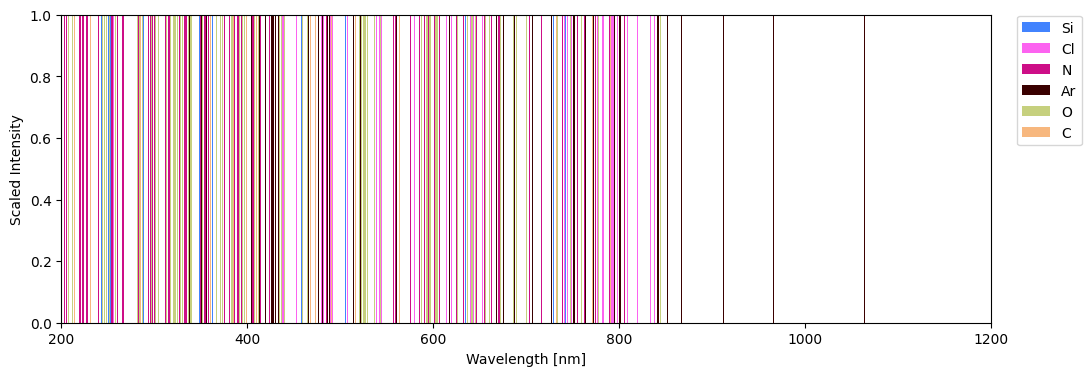

In [372]:
plt.figure(figsize=(12,4))
for idx, val in enumerate(mol1):
    plt.bar(val['wavelength'].values, np.ones(len(val['wavelength'].values)), color=color1[idx])
plt.xlim(200,1200)
plt.ylim(0,1)
plt.legend(['Si', 'Cl', 'N', 'Ar', 'O', 'C'], bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Intensity')
plt.show()

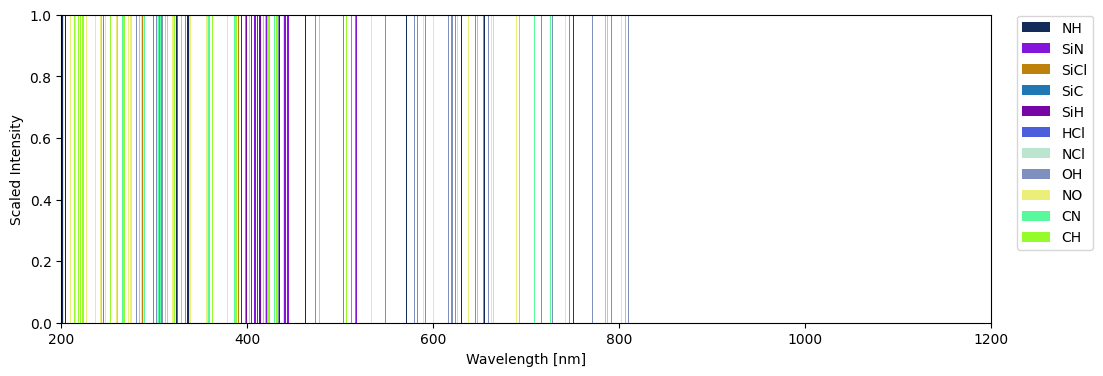

In [373]:
plt.figure(figsize=(12,4))
for idx, val in enumerate(mol2):
    plt.bar(val['wavelength'].values, np.ones(len(val['wavelength'].values)), color=color2[idx])
plt.xlim(200,1200)
plt.ylim(0,1)
plt.legend(['NH', 'SiN', 'SiCl', 'SiC', 'SiH', 'HCl', 'NCl', 'OH', 'NO', 'CN', 'CH'], bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Intensity')
plt.show()

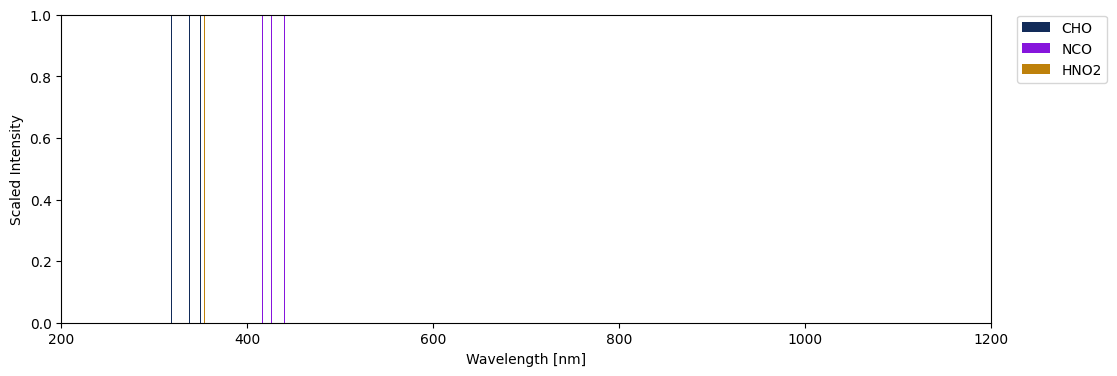

In [374]:
plt.figure(figsize=(12,4))
for idx, val in enumerate(mol3):
    plt.bar(val['wavelength'].values, np.ones(len(val['wavelength'].values)), color=color2[idx])
plt.xlim(200,1200)
plt.ylim(0,1)
plt.legend(['CHO', 'NCO', 'HNO2'], bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Intensity')
plt.show()

In [248]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(c10_NH3.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(c10_NH3.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

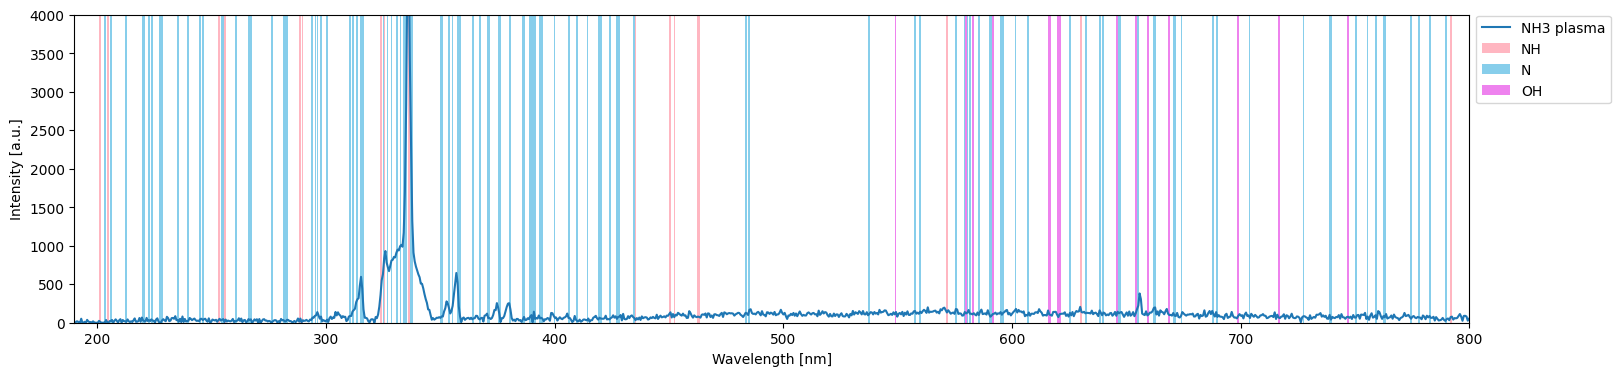

In [306]:
plt.figure(figsize=(18,4))
# axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
plt.plot(wavelength_scaled, c10_NH3.iloc[-5].T)
# axs.set_xticklabels(np.arange(200,700,100))
plt.bar(NH['wavelength'].values+0.13, 4000*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
plt.bar(N['wavelength'].values+0.13, 4000*np.ones(len(N['wavelength'].values)), color='skyblue', linewidth=1)
plt.bar(OH['wavelength'].values+0.13, 4000*np.ones(len(OH['wavelength'].values)), color='violet', linewidth=1)
plt.xlim(190,800)
plt.ylim(0,4000)
plt.legend(['NH3 plasma','NH','N','OH'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

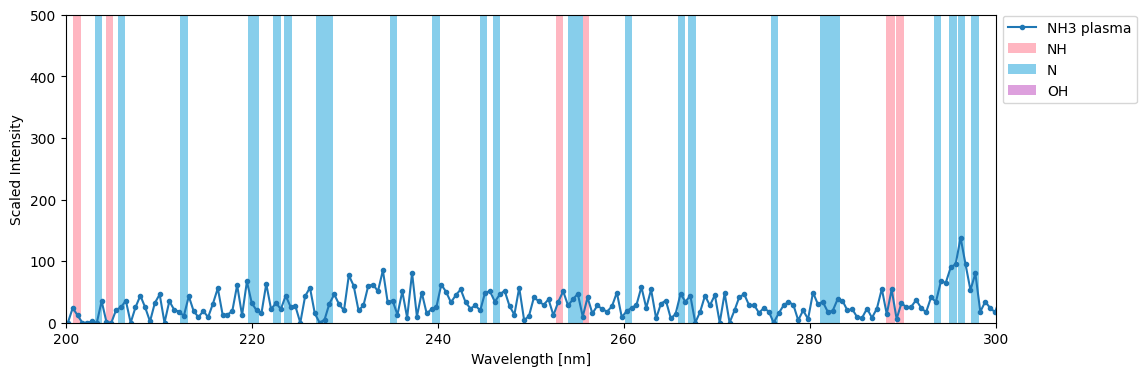

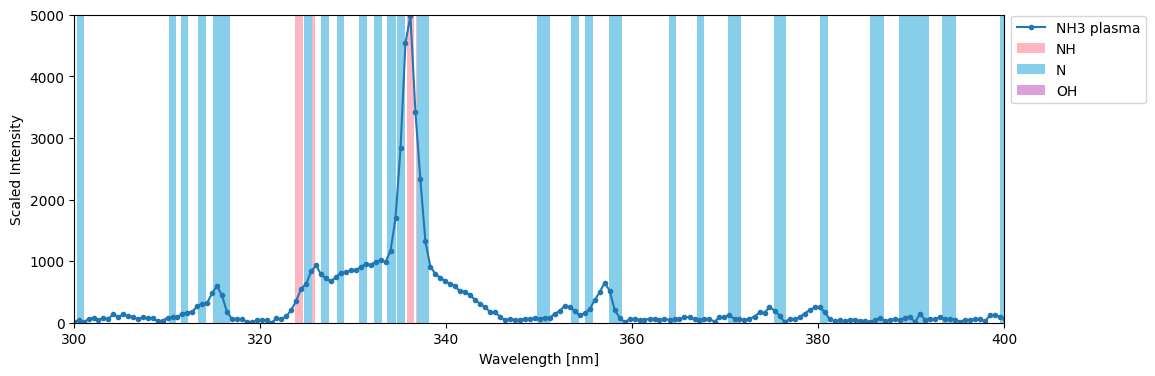

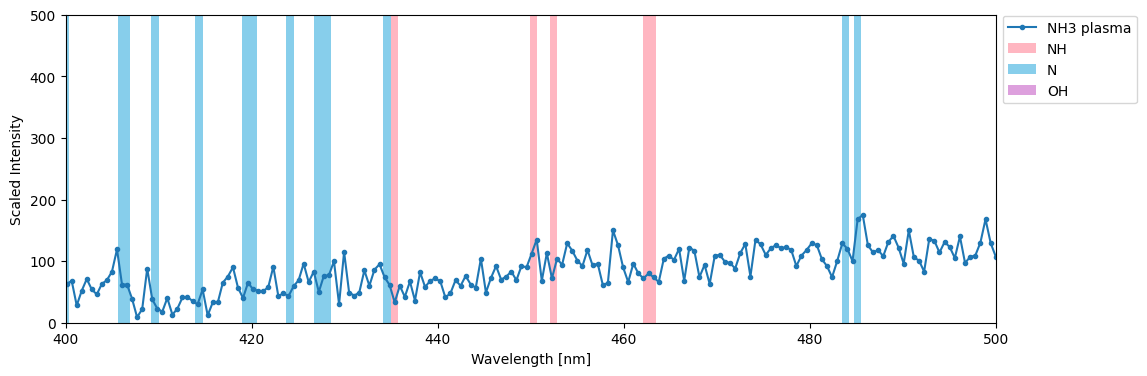

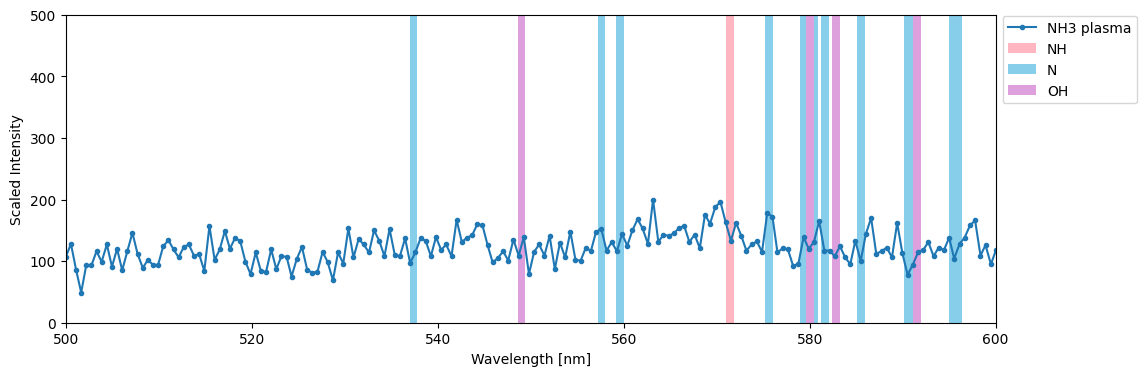

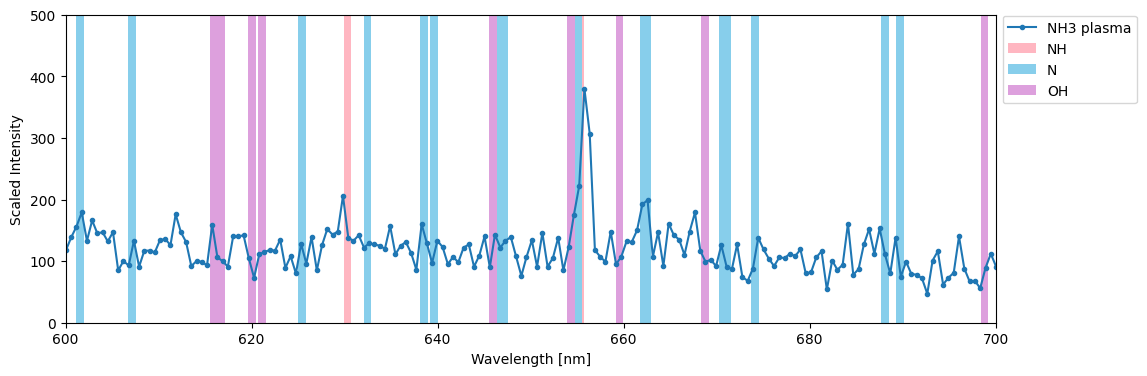

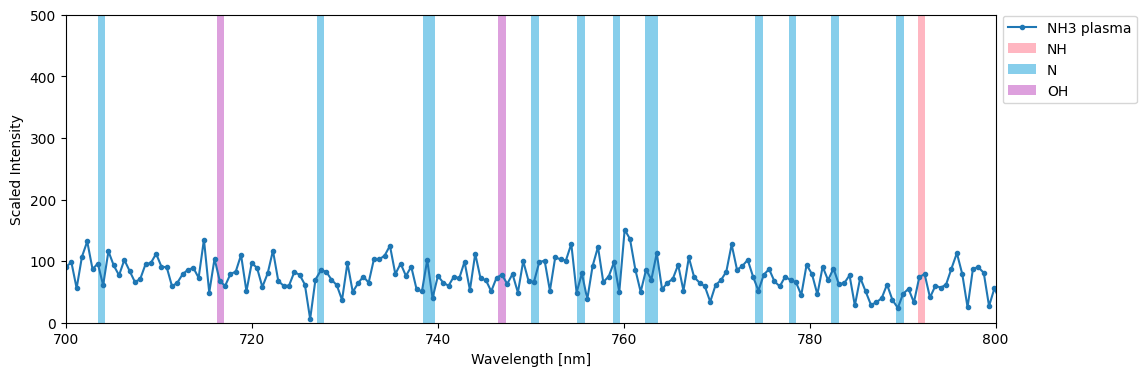

In [287]:
for i in range(2,8):
    plt.figure(figsize=(12,4))
    # axs = c10_NH3.iloc[-5].T.plot(kind='line', x=wavelength_scaled)
    plt.plot(wavelength_scaled, c10_NH3.iloc[-5].T, '.-')
    # axs.set_xticklabels(np.arange(200,700,100))
    if i==3:
        lim = 5000
    else:
        lim = 500
    plt.bar(NH['wavelength'].values+0.13, lim*np.ones(len(NH['wavelength'].values)), color='lightpink')
    plt.bar(N['wavelength'].values+0.13, lim*np.ones(len(N['wavelength'].values)), color='skyblue')
    plt.bar(OH['wavelength'].values+0.13, lim*np.ones(len(OH['wavelength'].values)), color='plum')
    plt.xlim(100*i,100*(i+1))
    if i==3:
        plt.ylim(0,5000)
    else:
        plt.ylim(0,500)
    plt.legend(['NH3 plasma','NH','N','OH'], bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Scaled Intensity')
    plt.show()

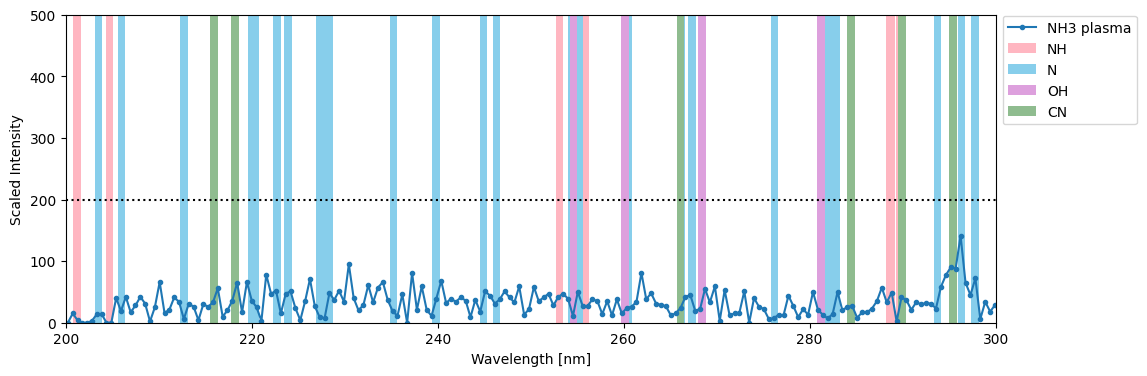

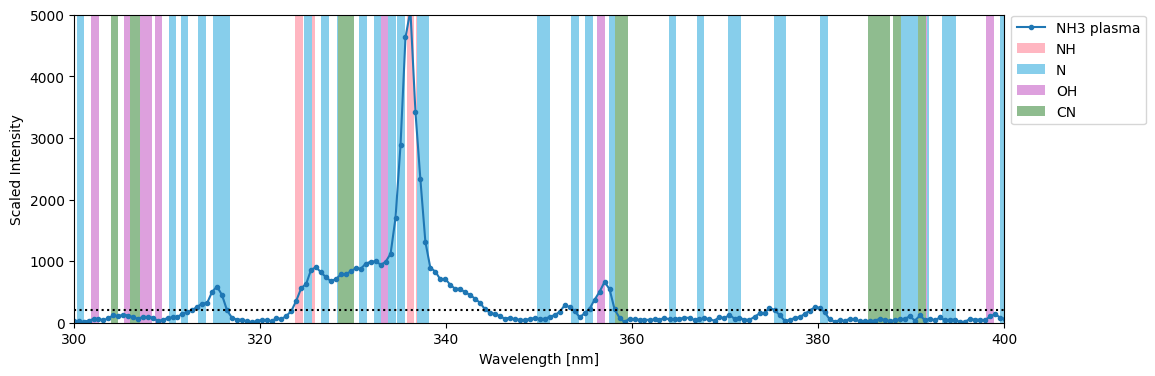

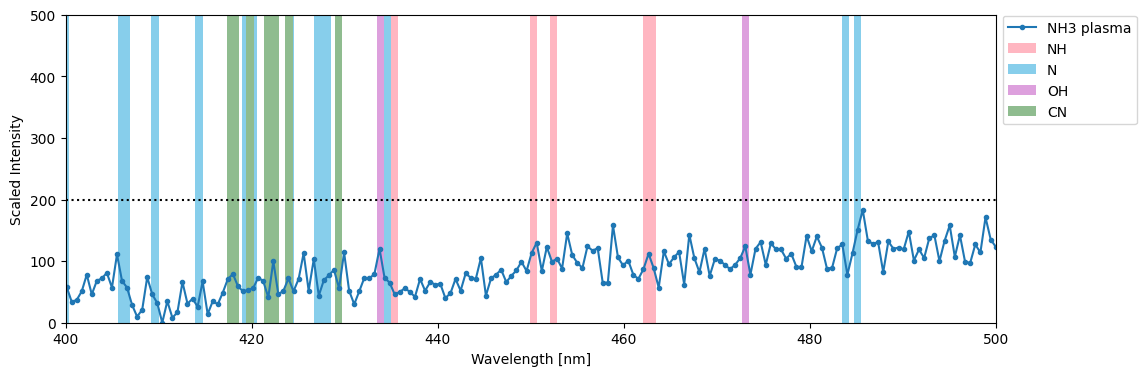

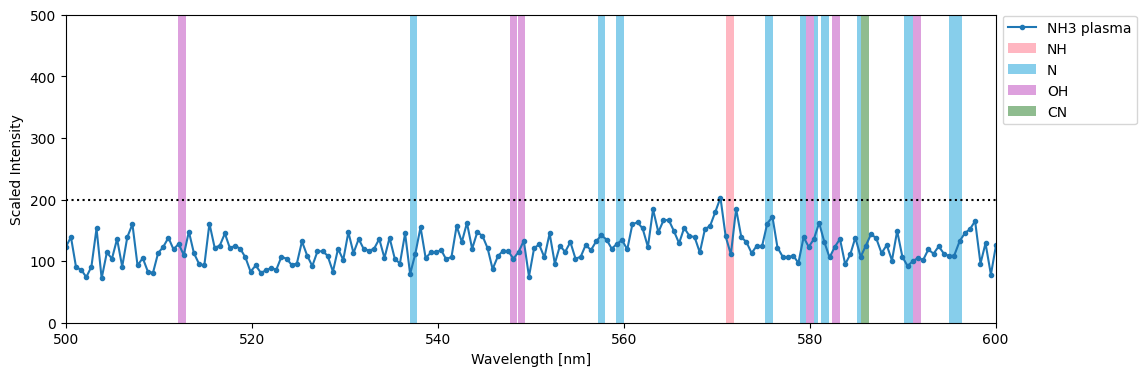

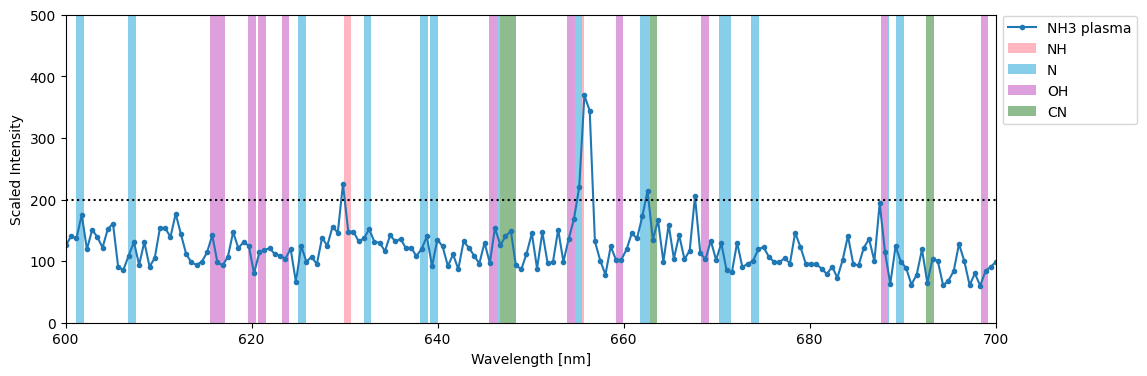

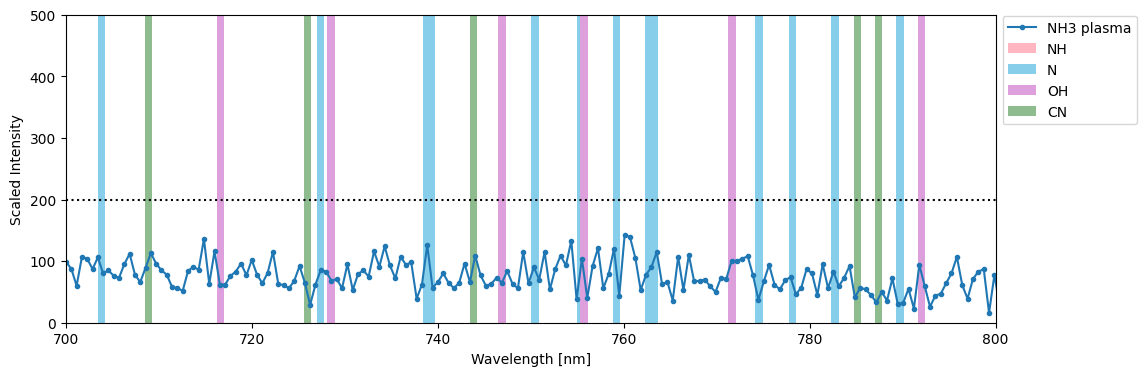

In [376]:
for i in range(2,8):
    plt.figure(figsize=(12,4))
    plt.plot(wavelength_scaled, c20_NH3.iloc[-5].T, '.-')
    # axs.set_xticklabels(np.arange(200,700,100))
    if i==3:
        lim = 5000
    else:
        lim = 500
    plt.bar(NH['wavelength'].values+0.13, lim*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
    plt.bar(H['wavelength'].values+0.13, lim*np.ones(len(H['wavelength'].values)), color='skyblue', linewidth=1)
    plt.bar(OH['wavelength'].values+0.13, lim*np.ones(len(OH['wavelength'].values)), color='plum', linewidth=1)
    plt.bar(CN['wavelength'].values+0.13, lim*np.ones(len(OH['wavelength'].values)), color='darkseagreen', linewidth=1)
    plt.xlim(100*i,100*(i+1))
    if i==3:
        plt.ylim(0,5000)
    else:
        plt.ylim(0,500)
    plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.axhline(y=200, color='black', ls=':', label=None)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Scaled Intensity')
    plt.show()

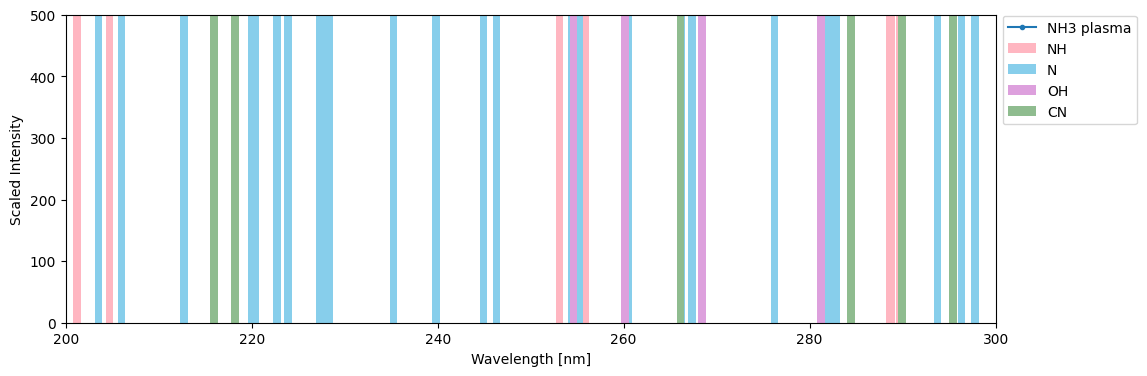

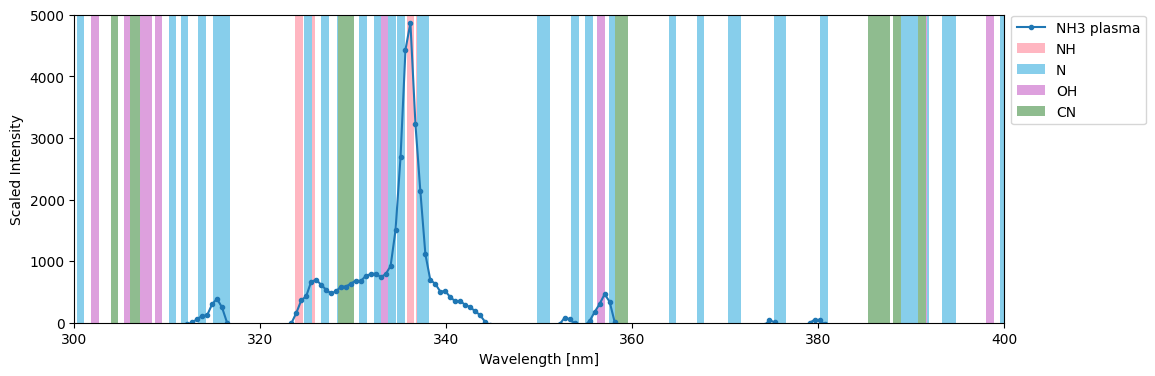

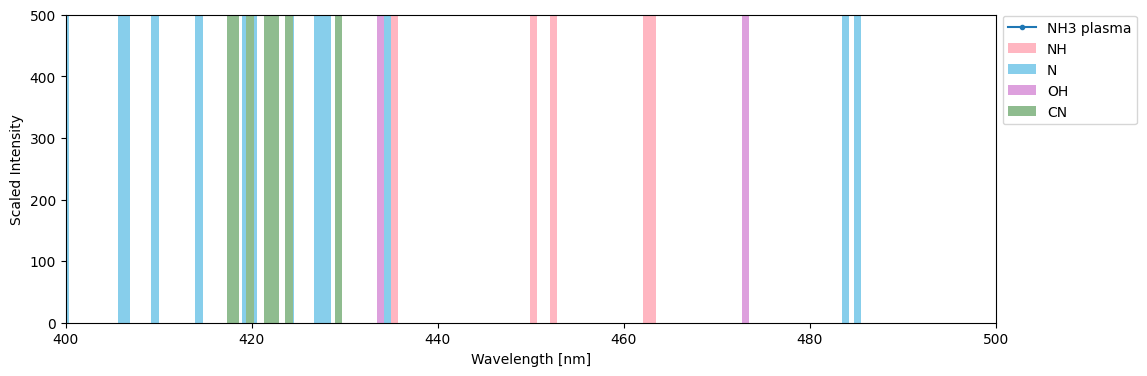

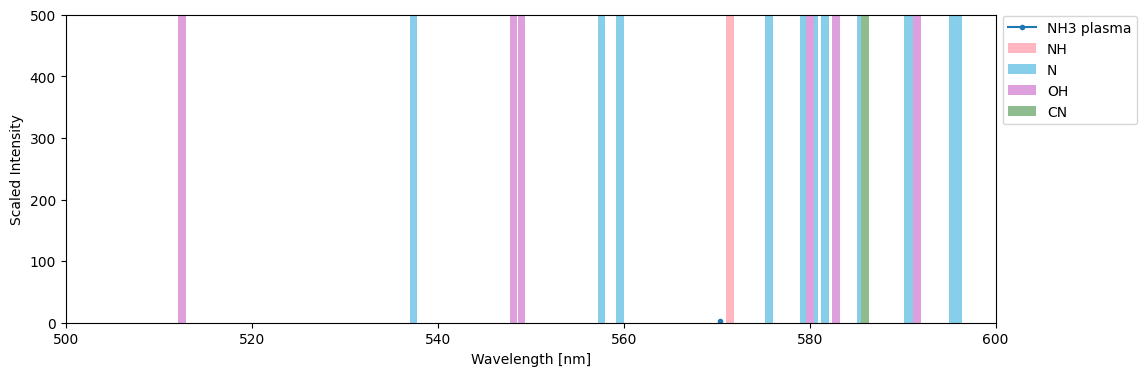

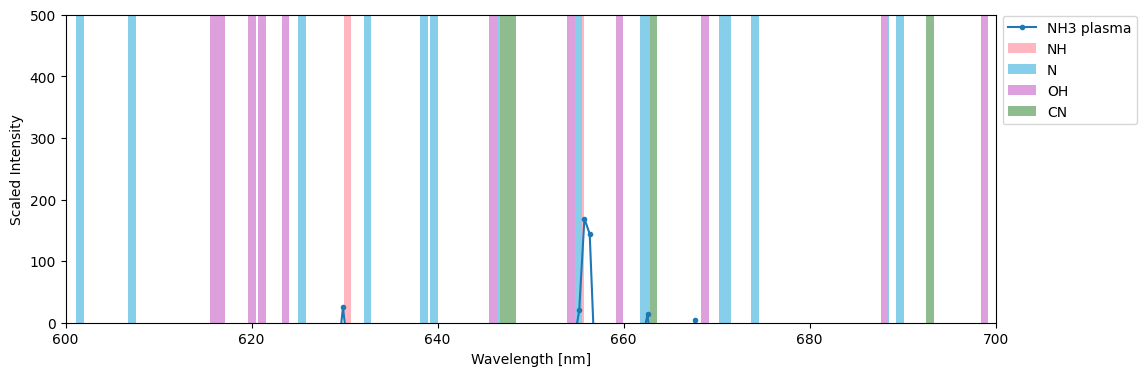

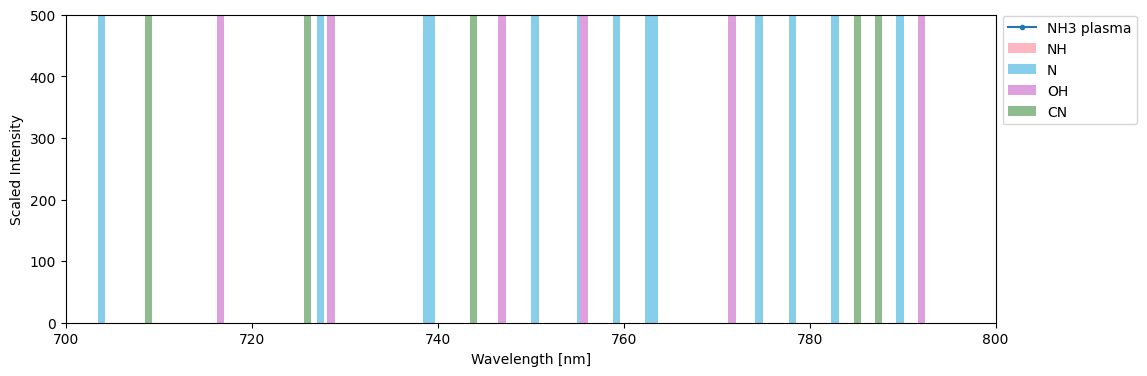

In [379]:
for i in range(2,8):
    plt.figure(figsize=(12,4))
    plt.plot(wavelength_scaled, c20_NH3.iloc[-5].T-200, '.-')
    # axs.set_xticklabels(np.arange(200,700,100))
    if i==3:
        lim = 5000
    else:
        lim = 500
    plt.bar(NH['wavelength'].values+0.13, lim*np.ones(len(NH['wavelength'].values)), color='lightpink', linewidth=1)
    plt.bar(H['wavelength'].values+0.13, lim*np.ones(len(H['wavelength'].values)), color='skyblue', linewidth=1)
    plt.bar(OH['wavelength'].values+0.13, lim*np.ones(len(OH['wavelength'].values)), color='plum', linewidth=1)
    plt.bar(CN['wavelength'].values+0.13, lim*np.ones(len(OH['wavelength'].values)), color='darkseagreen', linewidth=1)
    plt.xlim(100*i,100*(i+1))
    if i==3:
        plt.ylim(0,5000)
    else:
        plt.ylim(0,500)
    plt.legend(['NH3 plasma','NH','N','OH','CN'], bbox_to_anchor=(1, 1.02), loc='upper left')
    # plt.axhline(y=200, color='black', ls=':', label=None)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Scaled Intensity')
    plt.show()

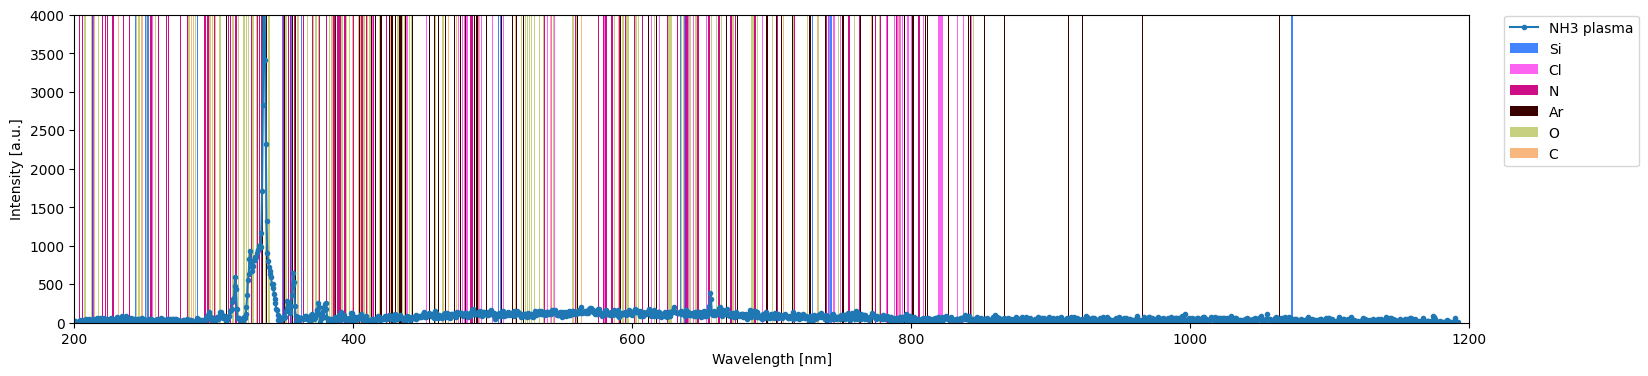

In [355]:
plt.figure(figsize=(18,4))
plt.plot(wavelength_scaled, c10_NH3.iloc[-5].T, '.-')
for idx, val in enumerate(mol1):
    plt.bar(val['wavelength'].values, 4000*np.ones(len(val['wavelength'].values)), color=color1[idx], linewidth=1)
plt.xlim(200,1200)
plt.ylim(0,4000)
plt.legend(['NH3 plasma', 'Si', 'Cl', 'N', 'Ar', 'O', 'C'], bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

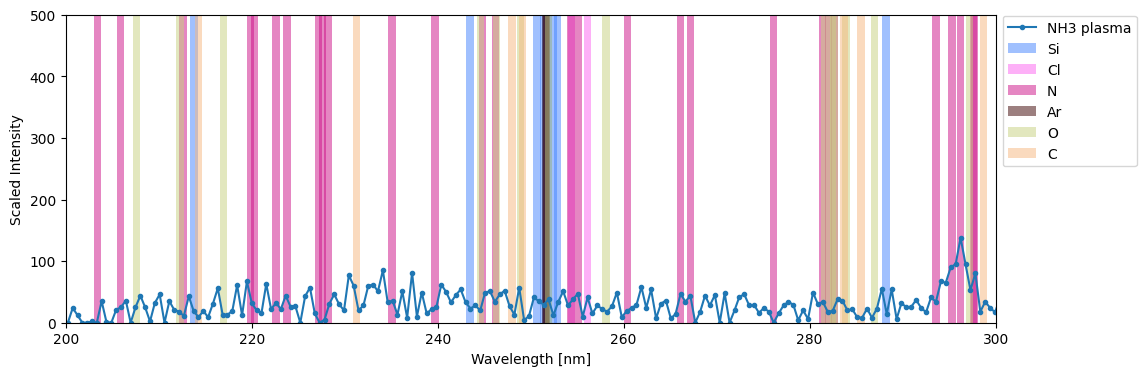

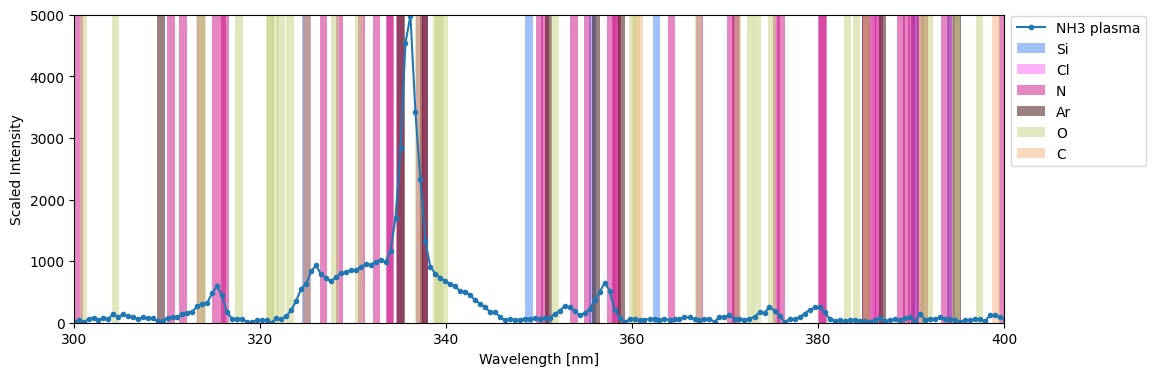

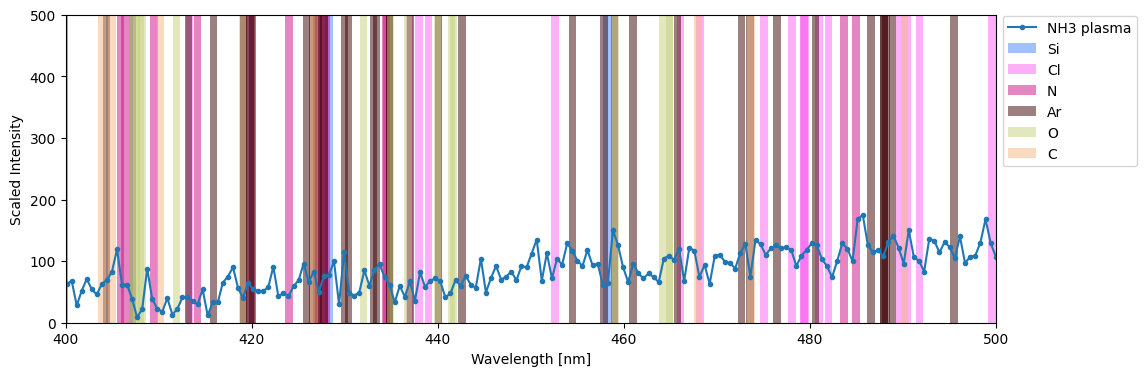

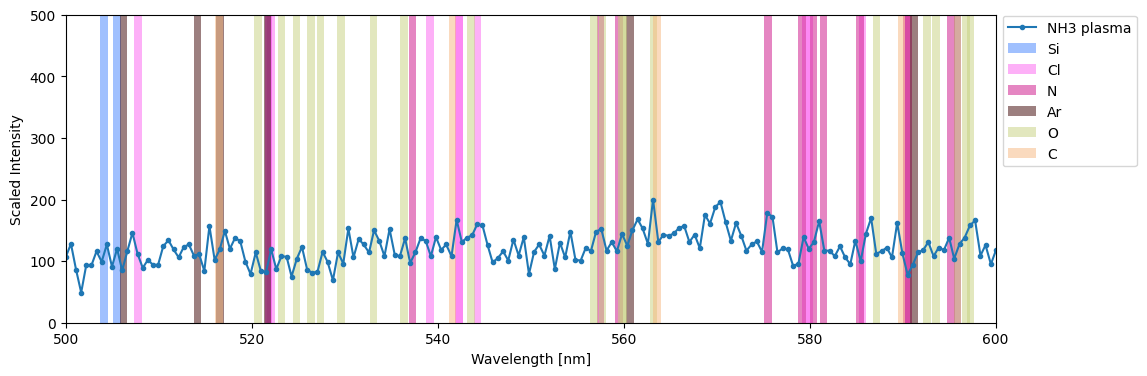

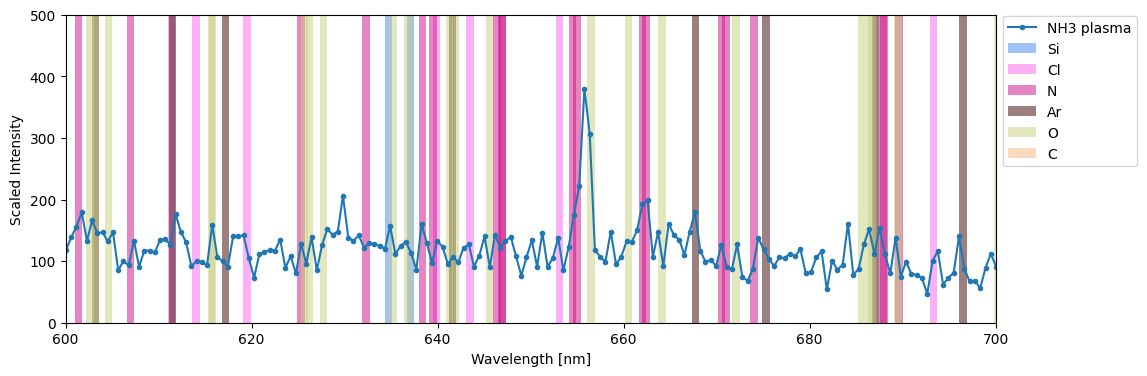

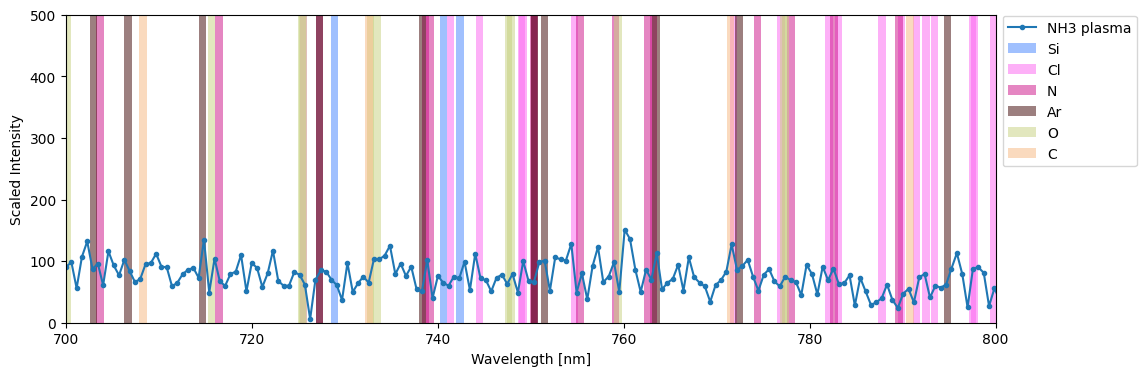

In [357]:
for i in range(2,8):
    plt.figure(figsize=(12,4))
    plt.plot(wavelength_scaled, c10_NH3.iloc[-5].T, '.-')
    if i==3:
        lim = 5000
    else:
        lim = 500
    for idx, val in enumerate(mol1):
        plt.bar(val['wavelength'].values, lim*np.ones(len(val['wavelength'].values)), color=color1[idx], linewidth=1, alpha=0.5)
    plt.xlim(100*i,100*(i+1))
    if i==3:
        plt.ylim(0,5000)
    else:
        plt.ylim(0,500)
    plt.legend(['NH3 plasma', 'Si', 'Cl', 'N', 'Ar', 'O', 'C'], bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Scaled Intensity')
    plt.show()

In [418]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = wavelength_scaled
y =  c10_NH3.iloc[-5]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[200,5100], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity; pattern 3')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[3]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#AD22AD'},
              'marker': {'color': [#AD22AD, #AD22AD, #AD22AD, ..., #AD22AD,
                                   #AD22AD, #AD22AD],
                         'line': {'color': [#AD22AD, #AD22AD, #AD22AD, ...,
                                            #AD22AD, #AD22AD, #AD22AD],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '7f20ae64-11df-4d99-9473-624349613918',
              'x': array([  49.75,   50.25,   50.75, ..., 1190.63, 1191.24, 1191.83]),
              'y': array([ 0.,  0.,  9., ...,  0.,  0., 15.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity; pattern 3'},
               'xaxis': {'gridcolor': 'lightgrey',
             

In [419]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process2/NH3_major_peaks.csv', index=False)

In [16]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_N2['336.67'].idxmax(), c40_N2['336.67'].idxmax(), c60_N2['336.67'].idxmax())

3.0 s 0.6 s 0.6 s


In [17]:
c20_log_N2 = c20_log[(c20_log.index>=c20_start+81)&(c20_log.index<=c20_start+84)]
c20_log_NH3 = c20_log[(c20_log.index>=c20_start+30)&(c20_log.index<=c20_start+43)]

c40_log_N2 = c40_log[(c40_log.index>=c40_start+62)&(c40_log.index<=c40_start+65)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+12)&(c40_log.index<=c40_start+25)]

c60_log_N2 = c60_log[(c60_log.index>=c60_start+76)&(c60_log.index<=c60_start+79)]
c60_log_NH3 = c60_log[(c60_log.index>=c60_start+25)&(c60_log.index<=c60_start+39)]

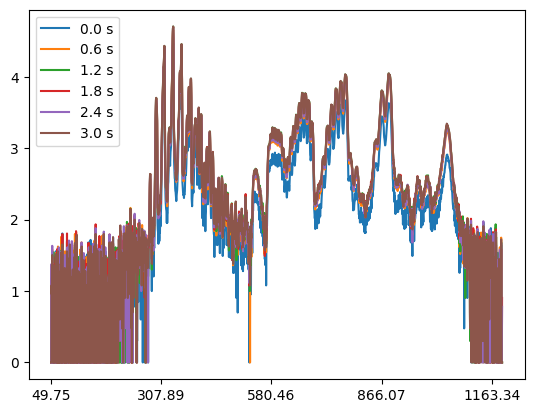

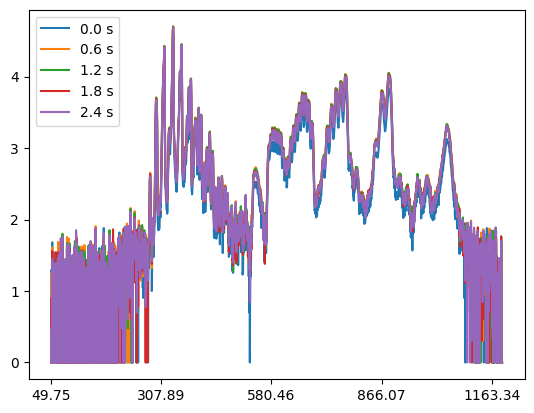

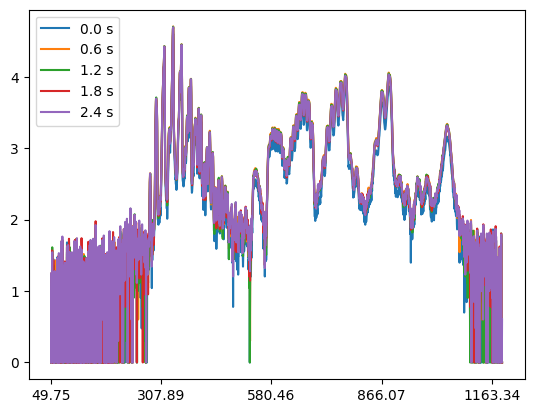

In [18]:
c20_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_N2))]
c20_log_N2.T.plot(kind='line')
plt.show()

c40_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_N2))]
c40_log_N2.T.plot(kind='line')
plt.show()

c60_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_N2))]
c60_log_N2.T.plot(kind='line')
plt.show()

In [19]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_log_N2['336.67'].idxmax(), c40_log_N2['336.67'].idxmax(), c60_log_N2['336.67'].idxmax())

3.0 s 0.6 s 0.6 s


In [20]:
# get the plot at 1.2s
c_N2_absolute = pd.concat([c20_N2[c20_N2.index=='3.0 s'], c40_N2[c40_N2.index=='0.6 s'], c60_N2[c60_N2.index=='0.6 s']])
c_N2_absolute.index = [20,40,60] # refers to cycles
c_N2_log = pd.concat([c20_log_N2[c20_log_N2.index=='3.0 s'], c40_log_N2[c40_log_N2.index=='0.6 s'], c60_log_N2[c60_log_N2.index=='0.6 s']])
c_N2_log.index = [20,40,60] # refers to cycles

In [21]:
c_N2_absolute

49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  ...  \
20    0.0    0.0   12.0    9.0   23.0   32.0    0.0    0.0    0.0    0.0  ...   
40    0.0    0.0   18.0    1.0    4.0   41.0    0.0    2.0    0.0    0.0  ...   
60    0.0    0.0    9.0    6.0    9.0   33.0    8.0    4.0    5.0    0.0  ...   

    1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  1190.63  \
20      0.0      0.0      0.0     0.0      3.0     53.0      4.0      0.0   
40      0.0     13.0      0.0    21.0      5.0     50.0      7.0      0.0   
60      0.0      0.0      0.0     0.0      0.0     47.0      0.0      0.0   

    1191.24  1191.83  
20      0.0      0.0  
40      0.0      0.0  
60      0.0      0.0  

[3 rows x 2048 columns]

In [22]:
c_N2_absolute.to_csv('file/process2/cycles_c_N2_absolute.csv')
c_N2_log.to_csv('file/process2/cycles_c_N2_log.csv')

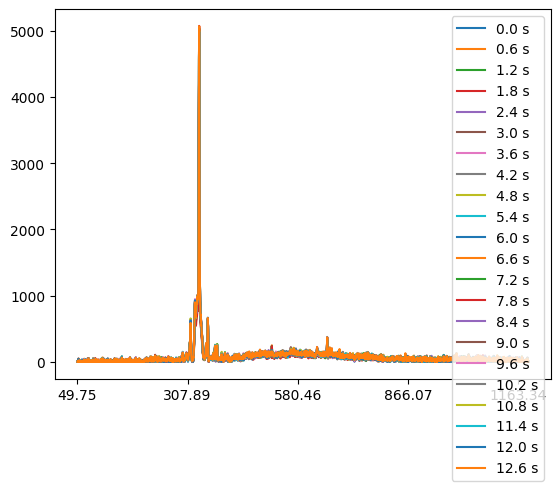

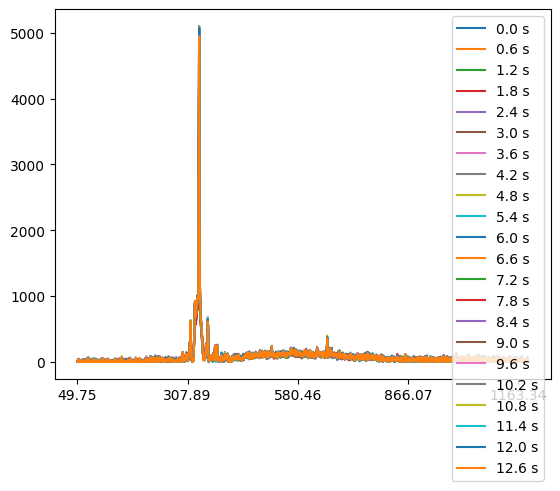

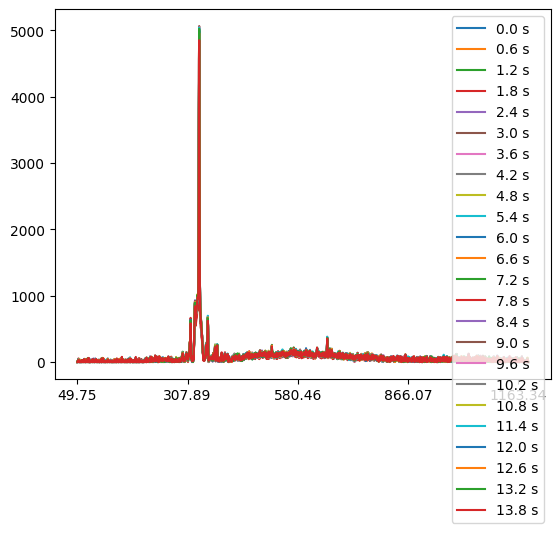

In [23]:
c20_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_NH3))]
c20_NH3.T.plot(kind='line')
plt.show()

c40_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

c60_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_NH3))]
c60_NH3.T.plot(kind='line')
plt.show()

In [24]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_NH3['336.13'].idxmax(), c40_NH3['336.13'].idxmax(), c60_NH3['336.13'].idxmax())

7.8 s 8.4 s 9.0 s


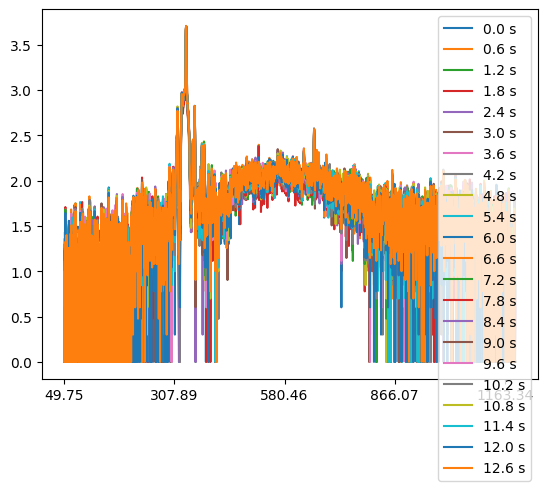

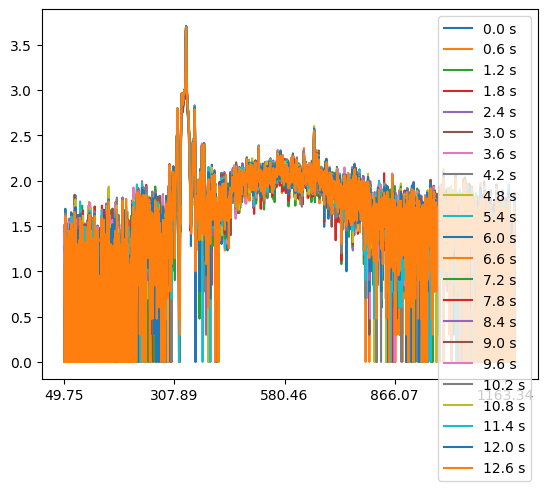

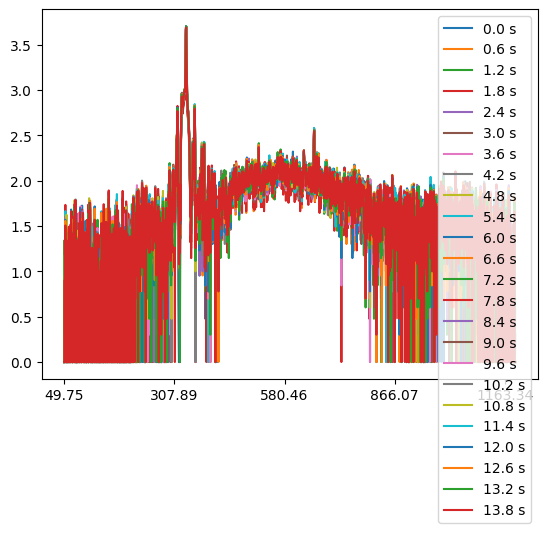

In [25]:
c20_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_NH3))]
c20_log_NH3.T.plot(kind='line')
plt.show()

c40_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_NH3))]
c40_log_NH3.T.plot(kind='line')
plt.show()

c60_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_NH3))]
c60_log_NH3.T.plot(kind='line')
plt.show()

In [26]:
# save NH3 at 6.6s
c_NH3_absolute = pd.concat([c20_NH3[c20_NH3.index=='7.8 s'], c40_NH3[c40_NH3.index=='8.4 s'], c60_NH3[c60_NH3.index=='9.0 s']])
c_NH3_log = pd.concat([c20_log_NH3[c20_log_NH3.index=='7.8 s'], c40_log_NH3[c40_log_NH3.index=='8.4 s'], c60_log_NH3[c60_log_NH3.index=='9.0 s']])

c_NH3_absolute.index = [20,40,60] # refers the 20th cycle
c_NH3_log.index = [20,40,60]
c_NH3_absolute

49.75  50.25  50.75  51.25  51.76  52.26  52.76  53.26  53.76  54.26  ...  \
20    0.0    0.0    3.0   10.0   16.0   34.0    7.0    0.0    3.0    0.0  ...   
40    0.0    0.0    3.0    3.0   15.0   35.0    0.0    0.0    0.0    0.0  ...   
60    0.0    0.0    7.0    3.0   16.0   23.0    0.0    0.0    0.0    0.0  ...   

    1186.38  1186.99  1187.58  1188.2  1188.81  1189.41  1190.02  1190.63  \
20      0.0      0.0      0.0     0.0      0.0     62.0     12.0      0.0   
40      0.0      5.0      0.0     0.0      0.0     52.0      0.0      0.0   
60      0.0      0.0      0.0    19.0      0.0     62.0      0.0      0.0   

    1191.24  1191.83  
20      0.0      4.0  
40      0.0      0.0  
60      0.0      0.0  

[3 rows x 2048 columns]

In [27]:
c_NH3_absolute.to_csv('file/process2/cycles_c_NH3_absolute.csv')
c_NH3_log.to_csv('file/process2/cycles_c_NH3_log.csv')

In [28]:
# random color generator
import random
random.seed(52)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(6)]

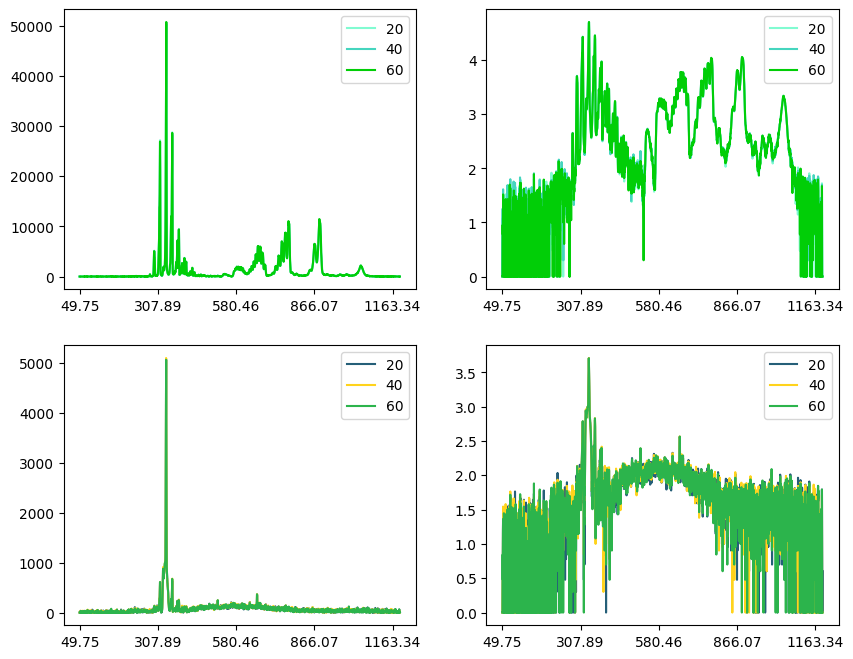

In [29]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
c_N2_absolute.T.plot(kind='line', ax=axs[0,0],color=colors[:3])
c_N2_log.T.plot(kind='line', ax=axs[0,1], color=colors[:3])
c_NH3_absolute.T.plot(kind='line',ax=axs[1,0], color=colors[3:])
c_NH3_log.T.plot(kind='line',ax=axs[1,1], color=colors[3:])
# fig.suptitle('Process2:NH3-N2')
plt.show()

In [30]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(c_N2_absolute.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(c_N2_absolute.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

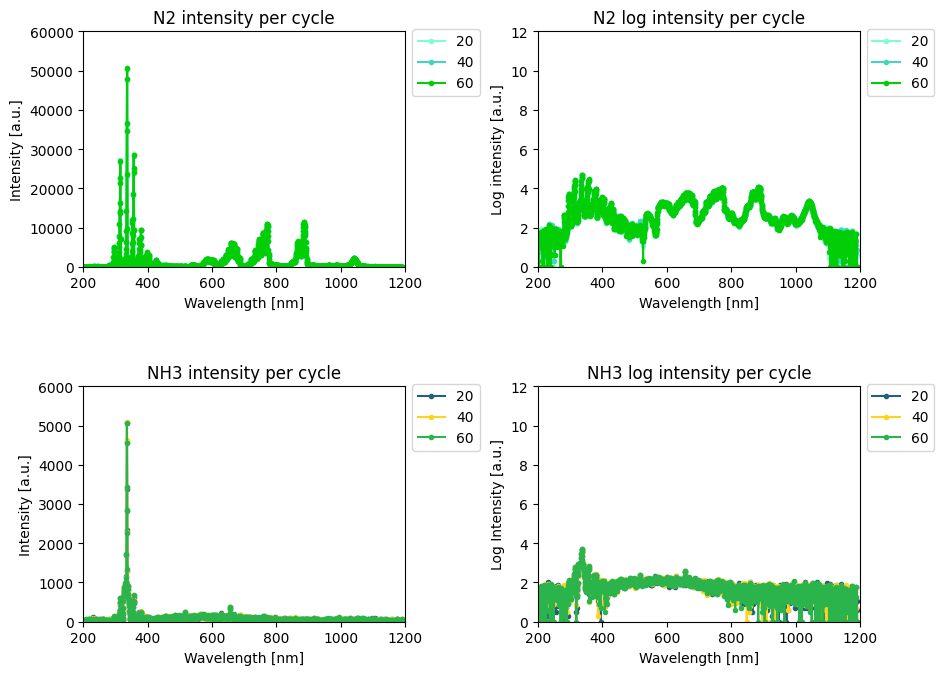

In [31]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
for i in range(3):
    axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
    axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity per cycle')
    axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
    axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity per cycle')
    axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity per cycle')
    axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity per cycle')
plt.show()

In [32]:
fig.savefig('file/process2/process2_dynamics.png')

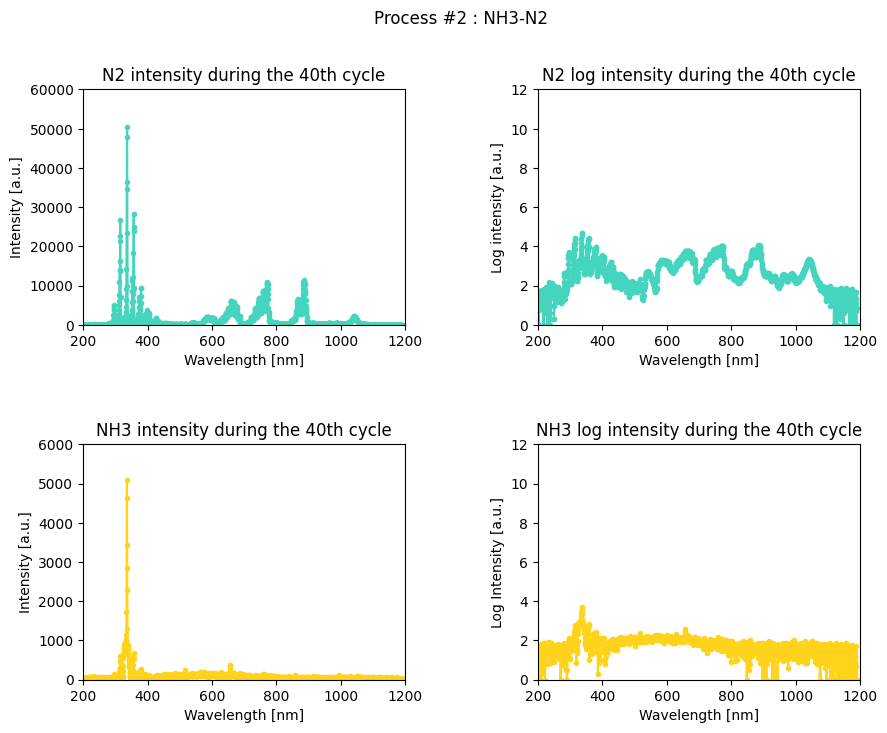

In [33]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
i = 1 # save the 40th cycle
axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
fig.suptitle('Process #2 : NH3-N2')
plt.show()

No significant differences in a change of intensity with cycles observed.

In [34]:
fig.savefig('file/process2/process2_cycle40.png',bbox_inches=False)

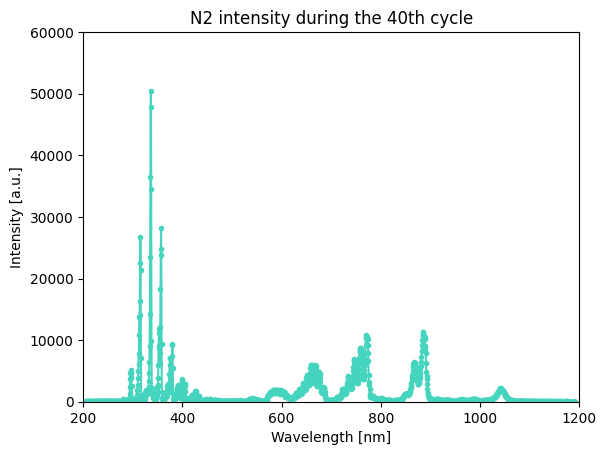

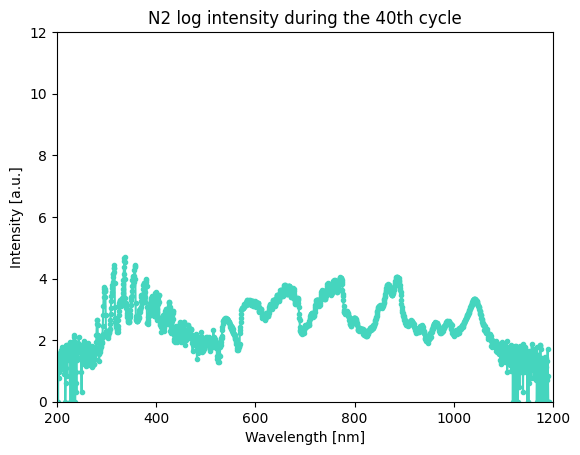

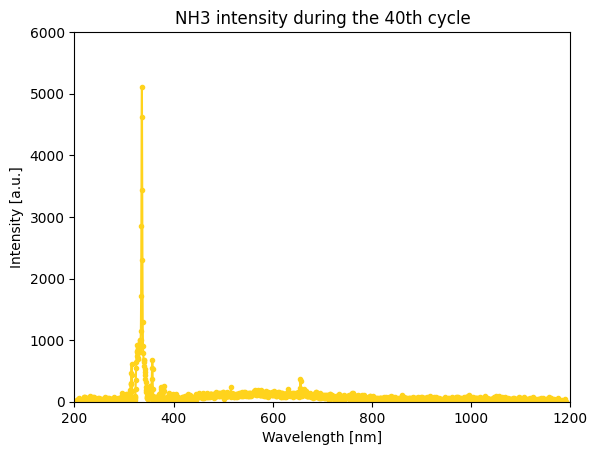

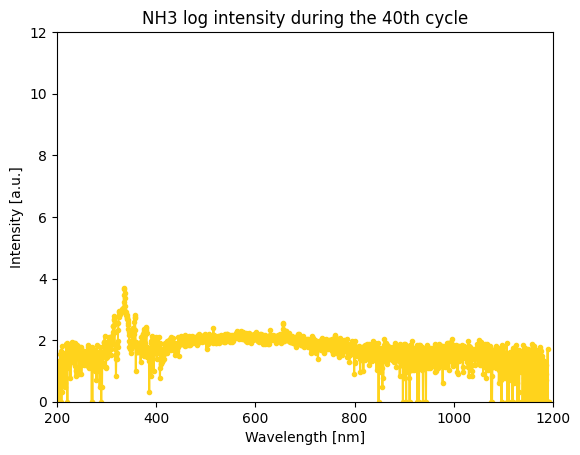

In [35]:
# to save each plot

i = 1 # save the 40th cycle
fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_log')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_log')

# fig, axis = plt.plot(c_N2_log.values.tolist()[i],'.-',color=colors[i])
# # axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
# plt.show()

In [36]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                         

In [40]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_N2_absolute.columns.tolist()]
y = c_N2_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '0728cf72-2122-4b8e-978d-8c7886b7bc5c',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([ 0.,  0., 18., ...,  0.,  0.,  0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
               

In [428]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks.csv', index=False)

In [430]:
# make them interactive
x = [float(i) for i in c_N2_log.columns.tolist()]
y = c_N2_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '3dd9d408-3726-4c24-8f33-7005bb3b3794',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 2.30258509, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 log intensity during the 40th cyc

In [432]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_N2_log.csv', index=False)

In [38]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_NH3_absolute.columns.tolist()]
y = c_NH3_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,6000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #2; NH3 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'a9ef6ff8-b3e5-423c-9958-7f176a28bb5c',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 3., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #2; NH3 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
                    

In [435]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_absolute.csv', index=False)

In [39]:
# make them interactive
x = [float(i) for i in c_NH3_log.columns.tolist()]
y = c_NH3_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; NH3 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'a1d897bc-ff39-45ad-bafd-c40ceb6e3c7f',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 0.47712125, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; NH3 log intensity during the 40th cy

In [437]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_log.csv', index=False)